In [1]:
from fastai.text import *
import html
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import io
import numpy as np
import json
import requests
import time
import pandas as pd

import spacy
import dill as pickle


In [2]:
from __future__ import print_function, unicode_literals, division

from bz2 import BZ2File
import time
import plac
import json

from spacy.matcher import PhraseMatcher

In [3]:
df = pd.read_csv('government-procurement-via-gebiz.csv')
df.head()

,tender_no.,tender_description,agency,award_date,tender_detail_status,supplier_name,awarded_amt
0,ACR000ETT14000007,Provision Of Event Management And Related Serv...,Accounting And Corporate Regulatory Authority,6/2/2015,Awarded to No Suppliers,Unknown,0.00
1,ACR000ETT14000008,Invitation To Tender For The Provision Of Alte...,Accounting And Corporate Regulatory Authority,30/4/2015,Awarded to No Suppliers,Unknown,0.00
2,ACR000ETT14000009,Invitation To Tender For The Provision Of Manp...,Accounting And Corporate Regulatory Authority,28/1/2015,Awarded to Suppliers,RMA CONTRACTS PTE. LTD.,76071.21
3,ACR000ETT15000004,Invitation To Tender For The Provision Of Manp...,Accounting And Corporate Regulatory Authority,1/7/2015,Awarded to Suppliers,TESCOM (SINGAPORE) SOFTWARE SYSTEMS TESTING PT...,84000.00
4,ACR000ETT15000005,Proposed Interior Fitting Out Works for ACRA's...,Accounting And Corporate Regulatory Authority,24/4/2015,Awarded to Suppliers,MKS GLOBAL PTE. LTD.,653255.00


In [90]:
text = " ".join(desc for desc in df.type)
print ("There are {} words in the combination of all review.".format(len(text)))


There are 1504712 words in the combination of all review.


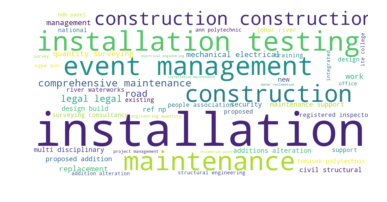

In [91]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Delivery","Supply","Term","YEAR","Tender","OPTION","EXTEND","TWO YEARS","System","commissioning","nanyang","invitation","services","service", "Provision","TWO", "YEARS","THREE","ANOTHER","AGREEMENT","one","unit","related","UNIVERSITY","SINGAPORE","REQUEST","PROPOSAL","Period","Systems","APPOINTMENT"])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=80, scale=3,stopwords=stopwords, max_words=50,  background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
wordcloud.to_file("testing.png")

# Testing for one description

In [8]:
nlp = spacy.load('en_core_web_md')
from spacy.lang.en.stop_words import STOP_WORDS
len(STOP_WORDS)

305

In [64]:
# testing for one data
text=nlp(df.tender_description[0])
t_l = ""
for token in text:
    t_l +=token.lower_+" "
    

print(t_l)
customize_stop_words = [
    'provision', 'acra','invitation','one','two','three','four','five','six','year','years','tender','contract',"a","period","lab","laboratory" ,"use"
]
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

text_rm=nlp(t_l)
category=""
previous_item=""
other=""

for n in text_rm.noun_chunks:
    check_noun=""
    n_nlp= nlp(n.text)
    for token in n_nlp:
        if not token.is_stop:
            check_noun+= token.text+" "
    
    if check_noun !="":
        if "service" in check_noun:
            if "related service" in check_noun :
                    category= previous_item 
            else:
                     category=check_noun
   
        elif "construction" in check_noun:
                category="construction"
        elif "building" in check_noun:
              category="construction"
        else:
              other +=check_noun+" "
    
    previous_item=check_noun;

if category=="":
    category=other
    
print(category)
print(other)


provision of event management and related services for the public accountants conference 2015 . ( there is a compulsory briefing on 13 nov 14 at 10 am at acra boardroom . only representatives who attended this compulsory briefing are eligible to participate in this tender ) . 
event management 
event management  the public accountants conference  compulsory briefing  13 nov  boardroom  only representatives  who  this compulsory briefing  this  


In [87]:
# user NER to filter the sentence
# testing for one data
text=nlp(df.tender_description[1345])
t_l = ""
for token in text:
    t_l +=token.lower_+" "
    

print(t_l)
customize_stop_words = [
    'provision', 'acra','invitation','one','two','three','four','five','six','year','years','tender','contract',"a","period","lab","laboratory" ,"use"
]
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

text_rm=nlp(t_l)
category=""
previous_item=""
other=""

for ent in text_rm.ents:
    print(ent.text,": ",ent.label_)
for n in text_rm.noun_chunks:
    check_noun=""
    n_nlp= nlp(n.text)
    for token in n_nlp:
        if not token.is_stop:
            check_noun+= token.text+" "
    
    if check_noun !="":
        if "service" in check_noun:
            if "related service" in check_noun :
                    category= previous_item 
            else:
                     category=check_noun
   
        elif "construction" in check_noun:
                category="construction"
        elif "building" in check_noun:
              category="construction"
        else:
              other +=check_noun+" "
    
    previous_item=check_noun;

if category=="":
    category=other
    
print(category)
print(other)


t06/2016-tender for the provision of benchmarking services for the manufacturing cost competitiveness of singapore 's energy and chemicals sector . 
t06/2016-tender :  ORG
benchmarking services 
t06/2016-tender  the  the manufacturing cost competitiveness  singapore 's energy and chemicals sector  


In [22]:
# text processing_using noun chunks
type_arr=[]

for i, des in enumerate(df.tender_description):
    
    category=""
    c_type=""
    previous_item=""
    other=""
    # change the text to lower case
    text_nlp= nlp(des)
    text_lower=""
    for token in text_nlp:
        text_lower+=token.lower_+" "
    customize_stop_words = [
    'provision', 'acra','invitation','one','two','three','four','five','six','year','years','tender','contract',"a","period","lab","laboratory" ,"use"
    ]
    for w in customize_stop_words:
         nlp.vocab[w].is_stop = True
    # initialized the parameters
    
    if "construction" in text_lower:
                 c_type="construction"
                   
    elif "alteration" in text_lower:
                 c_type="construction"
    elif ("bca" in text_lower) or ("underground detection" in text_lower) or ("hdb" in text_lower):
                 c_type="construction"
   
    elif ("build" in text_lower) or ("upgrading" in text_lower):
                c_type="construction"
    elif ("demolition" in text_lower) or ("erection" in text_lower)or ("roof relace" in text_lower) or ("reinstatement" in text_lower) or ("resurfac" in text_lower) or ("upgrading" in text_lower) or (("design" in text_lower) and ("install" in text_lower)):
                c_type="construction"
    elif ("soil investigation" in text_lower) or ("pipe" in text_lower) or ("rectification" in text_lower):
                c_type="construction"
    elif ("refurbishment" in text_lower) or ("renovat" in text_lower) or ("interior" in text_lower):
                c_type="construction"
               
    elif ("maintenance" in text_lower) or ("repair" in text_lower):
                c_type="maintenance"
    elif "marketing" in text_lower:
                 c_type="marketing"   
    elif ("panel" in text_lower) or ("exhibition" in text_lower):
                 c_type="event management"  
    elif "hdb upgrad" in text_lower:
                c_type="construction"
    elif "fund manag" in text_lower:
                c_type="fund management"
    elif "storage" in text_lower:
                c_type="storage"
    elif "safety" in text_lower:
                c_type="safety"
    elif "air" in text_lower and "conditioning" in text_lower:
                c_type="air conditioning"
    elif "integrated" in text_lower:
                c_type="integrated service"
    elif ("market research" in text_lower) or ("publication" in text_lower):
                c_type="marketing"
    elif "fishery" in text_lower:
                c_type="fishery"
    elif "bus" in text_lower:
                c_type="bus"
    elif "legal" in text_lower:
                 c_type="legal service"
    elif "plating" in text_lower:
                c_type="plating service"
    elif "typesetting" in text_lower:
                c_type="typesetting"
    elif "advertisement" in text_lower:
                c_type="advertisement"           
    elif ("course" in text_lower) or ("learning" in text_lower) or ("education" in text_lower) or ("training" in text_lower) or ("study" in text_lower) or ("training" in text_lower):
                c_type="training"
               
    elif ("supply" in text_lower) and ("delive" in text_lower):
                c_type="supply delivery"
               
    elif "digitiz" in text_lower:
                c_type="IT service"
    elif ("information" in text_lower) or ("second factor authen" in text_lower):
                c_type="IT service"
    elif ("consultancy" in text_lower) or ("consult" in text_lower):
                c_type="consultancy service"
    elif " content development" in text_lower:
                 c_type="content development service"
    elif ("data analytic" in text_lower) or ("data entry" in text_lower):
                 c_type="data analytic services"
    elif ("event manage" in text_lower) or (("event" in text_lower) and ("meeting" in text_lower)):
                 c_type="event management"
    elif "casino regulat" in text_lower:
                 c_type="casion regulatory"
    elif "audit" in text_lower:
                 c_type="auditing"
    elif "security" in text_lower:
                 c_type="security service"
    elif ("conference" in text_lower) or ("accommodation" in text_lower)or ("air ticket" in text_lower) or ("hotel" in text_lower) or ("travel" in text_lower) or ("trip" in text_lower):
                 c_type="travel"
    elif "insurance" in text_lower:
                 c_type="insurance"
    elif ("disease" in text_lower) or ("health" in text_lower):
                 c_type="health"
    elif "manpower" in text_lower:
                 c_type="manpower"
    elif "rental" in text_lower:
                 c_type="rental"
    elif "notebook" in text_lower:
                 c_type="equipment"
    elif "power" in text_lower:
                 c_type="power"
    elif ("cloud" in text_lower) or ("network" in text_lower):
                 c_type="IT service"
    elif ("print" in text_lower) or ("printing" in text_lower):
                 c_type="printing"
    elif "waste" in text_lower:
                 c_type="waste management"
    elif "electric" in text_lower:
                 c_type="electricity"
    elif "cleaning" in text_lower:
                 c_type = "cleaning service"
    elif ("catering" in text_lower) or ("meal" in text_lower):
                c_type = "catering service"
    elif ("food" in text_lower) or ("dinner" in text_lower):
                c_type="catering service"
    elif "civil" in text_lower:
                c_type="civil"
    elif "logistics" in text_lower:
                c_type="logistics design"
    elif "camp" in text_lower:
                c_type="school camp"
    elif "instructor" in text_lower:
                c_type="education"
    elif "survey" in text_lower:
                c_type="survey"
    elif "rescue" in text_lower:
                c_type="rescue"
    else:
        text_rm=nlp(text_lower)
        #token the noun in the sentence
        for n in text_rm.noun_chunks:
            check_noun=""
            n_nlp= nlp(n.text)
            for token in n_nlp:
                if not token.is_stop:
                    check_noun+= token.text+" "
                if check_noun !="":
                    if "service" in check_noun:
                        if "related service" in check_noun :
                            category= previous_item  
                        elif check_noun=="service" or check_noun =="services":
                            category= previous_item  
                        else:
                            category=check_noun
                    elif "supply" in check_noun:
                        category="supply"
                    elif "management" in check_noun:
                        category=check_noun
                    elif "plan" in check_noun:
                        category=check_noun
                    elif "project" in check_noun:
                        category=check_noun
                    elif "equipment" in check_noun:
                        category=check_noun
                    elif "computer" in check_noun:
                        category=check_noun
                    elif "system" in check_noun:
                        c_type=check_noun
                    elif "campaign" in check_noun:
                        c_type=check_noun
                    elif "facility" in check_noun:
                        c_type=check_noun
                    elif "programme" in check_noun:
                        c_type=check_noun
                    elif "assessment" in check_noun:
                        c_type=check_noun
                    elif "technology" in check_noun:
                        c_type=check_noun
                    elif "workshop" in check_noun:
                        category=check_noun
                    elif "promotion" in check_noun:
                        category=check_noun
                    elif ("licence" in check_noun) or ("license" in check_noun):
                        category="IT service"
                    elif "outreach" in check_noun:
                        category=check_noun
                    elif "subscription" in check_noun:
                        c_type="IT service"
                    elif "development" in check_noun:
                        c_type=check_noun
                    elif "activit" in check_noun:
                        c_type=check_noun
                    else:
                        other +=check_noun+" "
            
            previous_item=check_noun;
    if c_type!="":
            category=c_type
    if category=="":
            category=other
    type_arr= np.append(type_arr,category);
    print(i,": ",category)
    

0 :  event management
1 :  bus
2 :  manpower
3 :  manpower
4 :  construction
5 :  intrusion detection system 
6 :  rfas ) compliance review programme 
7 :  cleaning service
8 :  bus
9 :  consultancy service
10 :  rfas ) compliance review programme 
11 :  rfas ) compliance review programme 
12 :  supply delivery
13 :  bus
14 :  construction
15 :  maintenance
16 :  integrated service
17 :  supply delivery
18 :  construction
19 :  maintenance
20 :  construction
21 :  construction
22 :  the management 
23 :  training
24 :  printing
25 :  construction
26 :  IT service
27 :  construction
28 :  training
29 :  hosting services 
30 :  maintenance
31 :  supply delivery
32 :  maintenance
33 :  maintenance
34 :  storage
35 :  security service
36 :  training
37 :  construction
38 :  maintenance
39 :  construction
40 :  construction
41 :  construction
42 :  construction
43 :  construction
44 :  construction
45 :  construction
46 :  construction
47 :  maintenance
48 :  closed containment aquaculture 

380 :  training
381 :  caas ' knowledge management system 
382 :  construction
383 :  construction
384 :  horticultural services 
385 :  electricity
386 :  multilateration system 
387 :  electronic key management system 
388 :  maintenance
389 :  maintenance
390 :  training
391 :  civil
392 :  rescue
393 :  supply delivery
394 :  vehicle crash barrier system 
395 :  air conditioning
396 :  construction
397 :  infra - red thermographic scanning services 
398 :  maintenance
399 :  supply delivery
400 :  insurance
401 :  air conditioning
402 :  engagement  entertainment  entertainment artiste  caas  caas event  montreal  canada  
403 :  photography services 
404 :  photography services 
405 :  purchase  media  media space  the  the straits  the straits times  
406 :  supply delivery
407 :  supply
408 :  card access control system 
409 :  maintenance
410 :  electricity
411 :  supply delivery
412 :  training
413 :  insurance
414 :  consultancy service
415 :  consultancy service
416 :  trave

668 :  ( b ) programmes 
669 :  ( b ) programmes 
670 :  ( b ) programmes 
671 :  ( b ) programmes 
672 :  ( b ) programmes 
673 :  maintenance
674 :  the  the production  the  the commemorative  the commemorative edition  the  the fostering  the fostering cookbook  60  60  
675 :  school camp
676 :  consultancy service
677 :  itt  the  the appointment  new  new appointed  new appointed examination  new appointed examination administrator  aea  the  the administration  the  the res  the res and  the res and rea  the res and rea examinations  3  3  3  3 months  
678 :  legal service
679 :  legal service
680 :  legal service
681 :  legal service
682 :  legal service
683 :  legal service
684 :  legal service
685 :  legal service
686 :  legal service
687 :  legal service
688 :  airport development 
689 :  airport development 
690 :  manpower
691 :  survey
692 :  the truck platooning technology 
693 :  the truck platooning technology 
694 :  unmanned aircraft systems 
695 :  training
696 : 

1022 :  training
1023 :  change workshop 
1024 :  aerospace engineering programme 
1025 :  travel
1026 :  construction
1027 :  supply
1028 :  school camp
1029 :  training
1030 :  training
1031 :  training
1032 :  management 
1033 :  construction
1034 :  conceptualisation  execution  theatre  theatre play  
1035 :  construction
1036 :  event management
1037 :  travel
1038 :  survey
1039 :  event management
1040 :  training
1041 :  training
1042 :  uav  uav spares  
1043 :  project d2014 - 00169 c01 - land preparation 
1044 :  construction
1045 :  the  the  corneal  corneal refractive  corneal refractive surgery  
1046 :  supply
1047 :  event management
1048 :  branding and advertising services 
1049 :  training
1050 :  safety
1051 :  management 
1052 :  construction
1053 :  show lighting equipment 
1054 :  show lighting equipment 
1055 :  rental
1056 :  rental
1057 :  travel
1058 :  maintenance
1059 :  maintenance
1060 :  maintenance
1061 :  maintenance
1062 :  insurance
1063 :  mainten

1325 :  storage
1326 :  maintenance
1327 :  maintenance
1328 :  maintenance
1329 :  bus
1330 :  construction
1331 :  marketing
1332 :  marketing
1333 :  marketing
1334 :  marketing
1335 :  construction
1336 :  construction
1337 :  maintenance
1338 :  travel
1339 :  consultancy service
1340 :  household goods transportation 
1341 :  maintenance
1342 :  refining & chemical projects 
1343 :  maintenance
1344 :  printing
1345 :  benchmarking services 
1346 :  supply delivery
1347 :  construction
1348 :  training
1349 :  training
1350 :  maintenance
1351 :  construction
1352 :  legal service
1353 :  legal service
1354 :  legal service
1355 :  legal service
1356 :  legal service
1357 :  legal service
1358 :  legal service
1359 :  legal service
1360 :  legal service
1361 :  legal service
1362 :  legal service
1363 :  legal service
1364 :  legal service
1365 :  auditing
1366 :  supply delivery
1367 :  maintenance
1368 :  event management
1369 :  event management
1370 :  air conditioning
1371 :

1649 :  supply delivery
1650 :  construction
1651 :  construction
1652 :  services 
1653 :  supply
1654 :  IT service
1655 :  maintenance
1656 :  supply delivery
1657 :  security service
1658 :  security service
1659 :  event management
1660 :  training
1661 :  foreign service officers 
1662 :  saloon  saloon car  an  an official  an official car  the  the singapore  the singapore high  the singapore high commission  kuala  kuala lumpur  
1663 :  event management
1664 :  maintenance
1665 :  maintenance
1666 :  cleaning service
1667 :  construction
1668 :  construction
1669 :  event management
1670 :  insurance
1671 :  saloon  saloon car  an  an official  an official car  the  the singapore  the singapore high  the singapore high commission  kuala  kuala lumpur  
1672 :  maintenance
1673 :  construction
1674 :  security service
1675 :  saloon  saloon car  washington  washington mission  
1676 :  survey
1677 :  security service
1678 :  production  experience  experience singapore  (  ( e

1925 :  multi  multi -  multi - storey  multi - storey carparks  
1926 :  car  car parks  
1927 :  supply delivery
1928 :  supply delivery
1929 :  management plan 
1930 :  accredited checking services 
1931 :  accredited checking services 
1932 :  construction
1933 :  consultancy service
1934 :  construction
1935 :  construction
1936 :  construction
1937 :  construction
1938 :  construction
1939 :  construction
1940 :  construction
1941 :  construction
1942 :  maintenance
1943 :  construction
1944 :  construction
1945 :  construction
1946 :  event management
1947 :  construction
1948 :  construction
1949 :  construction
1950 :  construction
1951 :  construction
1952 :  construction
1953 :  construction
1954 :  construction
1955 :  construction
1956 :  construction
1957 :  construction
1958 :  maintenance
1959 :  bus
1960 :  consultancy service
1961 :  construction
1962 :  construction
1963 :  integrated service
1964 :  construction
1965 :  construction
1966 :  construction
1967 :  cons

2249 :  re  re -  re - roofing  re - roofing works  geylang  geylang bahru  geylang bahru industrial  geylang bahru industrial estate  
2250 :  maintenance
2251 :  construction
2252 :  construction
2253 :  construction
2254 :  construction
2255 :  construction
2256 :  construction
2257 :  construction
2258 :  construction
2259 :  construction
2260 :  construction
2261 :  construction
2262 :  construction
2263 :  supply
2264 :  car  car parks  
2265 :  construction
2266 :  maintenance
2267 :  the proposed public housing development 
2268 :  construction
2269 :  maintenance
2270 :  maintenance
2271 :  construction
2272 :  construction
2273 :  construction
2274 :  construction
2275 :  construction
2276 :  construction
2277 :  construction
2278 :  construction
2279 :  construction
2280 :  construction
2281 :  consultancy service
2282 :  construction
2283 :  event management
2284 :  construction
2285 :  construction
2286 :  advertisement
2287 :  construction
2288 :  construction
2289 :  con

2563 :  construction
2564 :  supply
2565 :  electricity
2566 :  construction
2567 :  construction
2568 :  logistics design
2569 :  air conditioning
2570 :  construction
2571 :  construction
2572 :  construction
2573 :  construction
2574 :  integrated service
2575 :  construction
2576 :  construction
2577 :  logistics design
2578 :  construction
2579 :  consultancy service
2580 :  proposed development 
2581 :  temporary  temporary car  temporary car park  the  the proposed  the proposed expansion  national  national skin  national skin centre  part  ts29  ts29 lot  martaban  martaban road  
2582 :  development 
2583 :  proposed development 
2584 :  integrated service
2585 :  proposed development 
2586 :  health
2587 :  construction
2588 :  proposed development 
2589 :  construction
2590 :  construction
2591 :  integrated service
2592 :  proposed development 
2593 :  integrated service
2594 :  integrated service
2595 :  construction
2596 :  supply
2597 :  construction
2598 :  integrated 

2871 :  satellite compass system 
2872 :  maintenance
2873 :  supply delivery
2874 :  supply delivery
2875 :  supply delivery
2876 :  supply delivery
2877 :  supply delivery
2878 :  construction
2879 :  training
2880 :  maintenance
2881 :  services 
2882 :  maintenance
2883 :  training
2884 :  construction
2885 :  supply
2886 :  supply
2887 :  supply delivery
2888 :  rental
2889 :  construction
2890 :  the  the skylight  the skylight glasses  replacement  damaged  damaged glasses  all  all arrival  departure  departure and  departure and admin  departure and admin blocks  ica  ica tuas  ica tuas checkpoint  
2891 :  construction
2892 :  supply delivery
2893 :  supply
2894 :  supply
2895 :  bus
2896 :  maintenance
2897 :  event management
2898 :  event management
2899 :  mounting and engraving services 
2900 :  mounting and engraving services 
2901 :  construction
2902 :  training
2903 :  maintenance
2904 :  maintenance
2905 :  maintenance
2906 :  auditing
2907 :  supply delivery
2908 :

3184 :  waterproofing  waterproofing replacement  associated  associated works  the  the roof  the  the ministry  home  home affairs  
3185 :  supply
3186 :  supply
3187 :  supply
3188 :  supply
3189 :  supply delivery
3190 :  consultancy service
3191 :  construction
3192 :  maintenance
3193 :  training
3194 :  construction
3195 :  supply delivery
3196 :  IT service
3197 :  maintenance
3198 :  outdoor video system 
3199 :  social media branding and management services 
3200 :  training
3201 :  training
3202 :  bus
3203 :  maintenance
3204 :  forensic imaging system 
3205 :  forensic imaging system 
3206 :  supply
3207 :  construction
3208 :  vehicle surveillance systems 
3209 :  vehicle surveillance systems 
3210 :  training
3211 :  development 
3212 :  supply
3213 :  supply
3214 :  training
3215 :  an immigration automated clearance system 
3216 :  construction
3217 :  maintenance
3218 :  supply
3219 :  supply
3220 :  supply delivery
3221 :  maintenance
3222 :  construction
3223 :  co

3509 :  health
3510 :  onsite smoking cessation programme 
3511 :  content development service
3512 :  health
3513 :  health
3514 :  marketing
3515 :  marketing
3516 :  marketing
3517 :  marketing
3518 :  insurance
3519 :  insurance
3520 :  school camp
3521 :  production  customised  customised stored  customised stored -  customised stored - value  customised stored - value cards  
3522 :  school camp
3523 :  health
3524 :  health
3525 :  auditing
3526 :  health
3527 :  school camp
3528 :  logistics design
3529 :  health
3530 :  marketing
3531 :  maintenance
3532 :  marketing
3533 :  health
3534 :  construction
3535 :  health
3536 :  health
3537 :  health
3538 :  health
3539 :  health
3540 :  health
3541 :  health
3542 :  opmt46/15  opmt46/15  the  the lease  portable  portable automated  portable automated external  portable automated external defibrillators  aeds  3  3  an  an option  another  another 1  another 1 +  another 1 + 1  another 1 + 1  
3543 :  health
3544 :  health
3545 

3808 :  construction
3809 :  supply delivery
3810 :  printing
3811 :  printing
3812 :  printing
3813 :  printing
3814 :  printing
3815 :  consultancy service
3816 :  maintenance
3817 :  event management
3818 :  supply delivery
3819 :  maintenance
3820 :  enrichment programme 
3821 :  enrichment programme 
3822 :  enrichment programme 
3823 :  enrichment programme 
3824 :  enrichment programme 
3825 :  enrichment programme 
3826 :  enrichment programme 
3827 :  maintenance
3828 :  the  the  meeting  meeting venue  facilities  idas  idas policy  idas policy regulatory  idas policy regulatory forum  
3829 :  health
3830 :  supply delivery
3831 :  IT service
3832 :  editorial and design services 
3833 :  editorial and design services 
3834 :  editorial and design services 
3835 :  editorial and design services 
3836 :  editorial and design services 
3837 :  editorial and design services 
3838 :  supply delivery
3839 :  event management
3840 :  supply delivery
3841 :  proof  concept  iot@sc

4098 :  construction
4099 :  legal service
4100 :  maintenance
4101 :  maintenance
4102 :  360 degree assessment tool 
4103 :  event management
4104 :  construction
4105 :  the  the appointment  media  media agency  international  international enterprise  international enterprise singapore  
4106 :  maintenance
4107 :  power
4108 :  logistics design
4109 :  bus
4110 :  legal service
4111 :  bus
4112 :  other hr services 
4113 :  disaster recovery services 
4114 :  auditing
4115 :  web  web -  web - based  web - based platform  media  media coverage  international  international enterprise  (  ( ie  ( ie )  ( ie ) singapore  
4116 :  maintenance
4117 :  service 
4118 :  printing
4119 :  ie  ie singapore  ie singapore 's  ie singapore 's new  ie singapore 's new trade  ie singapore 's new trade forecast  ie singapore 's new trade forecast model  
4120 :  construction
4121 :  legal service
4122 :  event management
4123 :  auditing
4124 :  bus
4125 :  security service
4126 :  construction

4334 :  the  the whole  (  ( wog  
4335 :  the  the whole  (  ( wog  
4336 :  the  the whole  (  ( wog  
4337 :  the  the whole  (  ( wog  
4338 :  the  the whole  (  ( wog  
4339 :  the  the whole  (  ( wog  
4340 :  the research and perception studies services cum framework agreement 
4341 :  the research and perception studies services cum framework agreement 
4342 :  the research and perception studies services cum framework agreement 
4343 :  the research and perception studies services cum framework agreement 
4344 :  the research and perception studies services cum framework agreement 
4345 :  the research and perception studies services cum framework agreement 
4346 :  the research and perception studies services cum framework agreement 
4347 :  the research and perception studies services cum framework agreement 
4348 :  the research and perception studies services cum framework agreement 
4349 :  the research and perception studies services cum framework agreement 
4350 :  th

4616 :  maintenance
4617 :  maintenance
4618 :  maintenance
4619 :  maintenance
4620 :  maintenance
4621 :  supply
4622 :  supply
4623 :  supply delivery
4624 :  supply delivery
4625 :  supply delivery
4626 :  training
4627 :  training
4628 :  training
4629 :  supply delivery
4630 :  supply delivery
4631 :  supply delivery
4632 :  supply delivery
4633 :  supply delivery
4634 :  integrated service
4635 :  maintenance
4636 :  supply delivery
4637 :  technical support services 
4638 :  maintenance
4639 :  maintenance
4640 :  request  proposal  the  the  sedimentary  sedimentary rocks  concrete  concrete production  
4641 :  request  proposal  the  the  sedimentary  sedimentary rocks  concrete  concrete production  
4642 :  jtc 's developments 
4643 :  jtc 's developments 
4644 :  jtc 's developments 
4645 :  jtc 's developments 
4646 :  jtc 's developments 
4647 :  jtc 's developments 
4648 :  maintenance
4649 :  reclamation  soil  soil improvement  tuas  tuas view  tuas view extension  t

4875 :  resources  inspection  premises  2  2  
4876 :  bus
4877 :  maintenance
4878 :  geotechnical ) services 
4879 :  logistics design
4880 :  construction
4881 :  security service
4882 :  maintenance
4883 :  extension  roads  drains  sewer  woodlands  woodlands industrial  woodlands industrial park  woodlands industrial park e2  
4884 :  proposed development 
4885 :  construction
4886 :  construction
4887 :  security service
4888 :  construction
4889 :  training
4890 :  logistics design
4891 :  appointment  custodian  
4892 :  maintenance
4893 :  integrated service
4894 :  infrastructure  tuas  tuas south  tuas south boulevard  tuas south boulevard extension  
4895 :  service 
4896 :  construction
4897 :  construction
4898 :  appointment  investment  investment managers  
4899 :  IT service
4900 :  training
4901 :  insurance
4902 :  insurance
4903 :  insurance
4904 :  bus
4905 :  construction
4906 :  road blocker system 
4907 :  infrastructure  tuas  tuas south  tuas south avenue  

5089 :  maintenance
5090 :  regular  regular inspection  roads  road  road facilities  expressways  west  west sector  
5091 :  regular  regular inspection  roads  road  road facilities  central  central and  central and east  central and east sector  
5092 :  fire protection system 
5093 :  communications system 
5094 :  construction
5095 :  lta projects 
5096 :  lta projects 
5097 :  supply
5098 :  consultancy service
5099 :  supply delivery
5100 :  maintenance
5101 :  a&a  a&a works  
5102 :  bus
5103 :  consultancy service
5104 :  consultancy service
5105 :  maintenance
5106 :  construction
5107 :  survey
5108 :  proposed  proposed utilities  proposed utilities diversion  siglap  siglap link  south  south ave  
5109 :  consultancy service
5110 :  half  half height  half height platform  half height platform screen  half height platform screen doors  canberra  canberra station  
5111 :  safety
5112 :  electricity
5113 :  bus
5114 :  bus
5115 :  construction
5116 :  auxiliary  auxili

5310 :  term  term  production  publicity  publicity materials  
5311 :  electricity
5312 :  architectural / engineering services 
5313 :  architectural / engineering services 
5314 :  construction
5315 :  survey
5316 :  survey
5317 :  supply delivery
5318 :  supply delivery
5319 :  construction
5320 :  bus
5321 :  auditing
5322 :  automatic  automatic fare  automatic fare collection  (  ( afc  ( afc )  ( afc ) gates  
5323 :  programme 
5324 :  commercial advisory services 
5325 :  maintenance
5326 :  consultancy service
5327 :  supply
5328 :  communications system 
5329 :  construction
5330 :  review  regulatory  regulatory framework  
5331 :  construction
5332 :  cepas  cepas concession  cepas concession cards  
5333 :  consultancy service
5334 :  trial  existing  existing pedestrian  existing pedestrian overhead  existing pedestrian overhead bridges  (  ( package  
5335 :  trial  existing  existing pedestrian  existing pedestrian overhead  existing pedestrian overhead bridges  (  (

5528 :  supply delivery
5529 :  bus
5530 :  maintenance
5531 :  IT service
5532 :  marketing
5533 :  printing
5534 :  manager development programme 
5535 :  manager development programme 
5536 :  training
5537 :  maintenance
5538 :  maintenance
5539 :  mas  mas social  mas social media  mas social media analytics  pr3073-cpc  
5540 :  oracle software support services 
5541 :  maintenance
5542 :  maintenance
5543 :  maintenance
5544 :  staff  staff seminar  staff seminar package  
5545 :  maintenance
5546 :  maintenance
5547 :  catering service
5548 :  IT service
5549 :  supply delivery
5550 :  maintenance
5551 :  supply delivery
5552 :  research project 
5553 :  training
5554 :  training
5555 :  supply delivery
5556 :  IT service
5557 :  IT service
5558 :  maintenance
5559 :  IT service
5560 :  training
5561 :  construction
5562 :  maintenance
5563 :  supply delivery
5564 :  power
5565 :  mas manager development programme 
5566 :  training
5567 :  training
5568 :  mas coaching programm

5819 :  event management
5820 :  event management
5821 :  event management
5822 :  event management
5823 :  event management
5824 :  event management
5825 :  event management
5826 :  event management
5827 :  event management
5828 :  training
5829 :  training
5830 :  construction
5831 :  construction
5832 :  construction
5833 :  co - curricular activities facilitation toolkits 
5834 :  supply delivery
5835 :  construction
5836 :  training
5837 :  construction
5838 :  construction
5839 :  school camp
5840 :  construction
5841 :  training
5842 :  training
5843 :  construction
5844 :  security service
5845 :  security service
5846 :  security service
5847 :  security service
5848 :  bus
5849 :  IT service
5850 :  supply delivery
5851 :  supply delivery
5852 :  supply delivery
5853 :  supply delivery
5854 :  supply delivery
5855 :  auditing
5856 :  auditing
5857 :  auditing
5858 :  auditing
5859 :  auditing
5860 :  auditing
5861 :  auditing
5862 :  auditing
5863 :  auditing
5864 :  auditing

6118 :  counter  counter staff  the  the singapore  the singapore maritime  the singapore maritime gallery  an  an option  another  another  another  
6119 :  security service
6120 :  training
6121 :  marketing
6122 :  training
6123 :  event management
6124 :  training
6125 :  maintenance
6126 :  maintenance
6127 :  maintenance
6128 :  construction
6129 :  event management
6130 :  emergency response craft and crew services 
6131 :  outpatient medical services 
6132 :  outpatient medical services 
6133 :  design  production  mpa  mpa 's  mpa 's 20th  mpa 's 20th anniversary  mpa 's 20th anniversary book  
6134 :  safety
6135 :  maintenance
6136 :  maintenance
6137 :  enhancement  /  / anchorages  cargo  cargo operations  
6138 :  construction
6139 :  construction
6140 :  construction
6141 :  legal service
6142 :  legal service
6143 :  legal service
6144 :  legal service
6145 :  construction
6146 :  supply delivery
6147 :  catering service
6148 :  supply delivery
6149 :  legal service
61

6302 :  marketing
6303 :  marketing
6304 :  marketing
6305 :  national development 
6306 :  school camp
6307 :  ( pn ) services 
6308 :  construction
6309 :  construction
6310 :  photography services 
6311 :  maintenance
6312 :  marketing
6313 :  national development complex 
6314 :  digital media ad - buying services 
6315 :  mnd instagram engagement project 
6316 :  videography services 
6317 :  maintenance
6318 :  training
6319 :  marketing
6320 :  marketing
6321 :  marketing
6322 :  outdoor advertising services 
6323 :  school camp
6324 :  school camp
6325 :  training
6326 :  project management services 
6327 :  implementation  key  key elements  the  the national  the national social  the national social work  the national social work competency  the national social work competency framework  
6328 :  event management
6329 :  travel
6330 :  35 - 45 middle management 
6331 :  vwod pilot social - design project series 
6332 :  training
6333 :  training
6334 :  planning 
6335 :  soci

6604 :  relocation  air  air monitoring  air monitoring station  
6605 :  vector control services 
6606 :  portable  portable toilets  designated  designated locations  
6607 :  construction
6608 :  construction
6609 :  consultancy service
6610 :  maintenance
6611 :  construction
6612 :  development 
6613 :  supply delivery
6614 :  supply delivery
6615 :  supply delivery
6616 :  supply delivery
6617 :  supply delivery
6618 :  supply delivery
6619 :  supply delivery
6620 :  supply delivery
6621 :  supply delivery
6622 :  supply delivery
6623 :  construction
6624 :  construction
6625 :  proposed development 
6626 :  supply delivery
6627 :  supply delivery
6628 :  construction
6629 :  safety
6630 :  public  public drains  
6631 :  supply delivery
6632 :  supply delivery
6633 :  supply delivery
6634 :  supply delivery
6635 :  IT service
6636 :  demonstration  treatment  incineration  ash  ifa  
6637 :  demonstration  treatment  incineration  ash  ifa  
6638 :  demonstration  treatment  inc

6840 :  the  the conceptualisation  programming  an  an events  an events space  cathay  cathay green  :  : the  : the '  : the ' house  singapore  singapore night  singapore night festival  
6841 :  events management services 
6842 :  event management
6843 :  construction
6844 :  construction
6845 :  construction
6846 :  construction
6847 :  construction
6848 :  construction
6849 :  training
6850 :  supply
6851 :  logistics design
6852 :  audio visual equipment 
6853 :  infrared imaging system 
6854 :  survey
6855 :  event management
6856 :  event management
6857 :  civil
6858 :  civil
6859 :  survey
6860 :  supply delivery
6861 :  construction
6862 :  maintenance
6863 :  maintenance
6864 :  maintenance
6865 :  nie 's initial teacher preparation programme 
6866 :  nie 's initial teacher preparation programme 
6867 :  integrated service
6868 :  integrated service
6869 :  training
6870 :  training
6871 :  maintenance
6872 :  construction
6873 :  marketing
6874 :  integrated service
6875

7013 :  fabrication and installation services 
7014 :  event management
7015 :  application development 
7016 :  application development 
7017 :  application development 
7018 :  application development 
7019 :  application development 
7020 :  application development 
7021 :  application development 
7022 :  consultancy service
7023 :  construction
7024 :  the  the appointment  contractor  conservation  conservation materials  tools  the  the national  the national library  the national library board  singapore  
7025 :  ( b ) translation services 
7026 :  ( b ) translation services 
7027 :  oral history services 
7028 :  construction
7029 :  digitisation services 
7030 :  cleaning service
7031 :  construction
7032 :  maintenance
7033 :  landscape development 
7034 :  grasscutting works 
7035 :  maintenance
7036 :  logistics design
7037 :  construction
7038 :  construction
7039 :  medical outpatient services 
7040 :  construction
7041 :  kiosk services 
7042 :  supply delivery
7043 : 

7275 :  np  mild  mild steel  mild steel railings  block  
7276 :  medical services 
7277 :  proxy system 
7278 :  school camp
7279 :  printing
7280 :  removal & disposal services 
7281 :  supply
7282 :  services 
7283 :  maintenance
7284 :  insurance
7285 :  insurance
7286 :  insurance
7287 :  insurance
7288 :  supply
7289 :  bus
7290 :  bus
7291 :  bus
7292 :  bus
7293 :  training
7294 :  gym management services 
7295 :  travel
7296 :  construction
7297 :  school camp
7298 :  electricity
7299 :  construction
7300 :  construction
7301 :  sports facilities management 
7302 :  sports facilities management 
7303 :  sports facilities management 
7304 :  youth mentoring programme 
7305 :  construction
7306 :  maintenance
7307 :  catering service
7308 :  (  (  ( ref  np  np /  np / sdar/6/15  grf  sdar/15/0007  3d2n  3d2n polytechnic  3d2n polytechnic forum  3d2n polytechnic forum 2015  3d2n polytechnic forum 2015 residential  3d2n polytechnic forum 2015 residential component  johor  johor 

7423 :  construction
7424 :  abrasive waterjet 3d cutting system 
7425 :  training
7426 :  maintenance
7427 :  travel
7428 :  ngee ann polytechnic cca club coaching services 
7429 :  services 
7430 :  services 
7431 :  printing
7432 :  services 
7433 :  services 
7434 :  services 
7435 :  services 
7436 :  ngee ann polytechnic cca club coaching services 
7437 :  ngee ann polytechnic cca club coaching services 
7438 :  ngee ann polytechnic cca club coaching services 
7439 :  ngee ann polytechnic cca club coaching services 
7440 :  ngee ann polytechnic cca club coaching services 
7441 :  ngee ann polytechnic cca club coaching services 
7442 :  ngee ann polytechnic cca club coaching services 
7443 :  ngee ann polytechnic cca club coaching services 
7444 :  ngee ann polytechnic cca club coaching services 
7445 :  ngee ann polytechnic cca club coaching services 
7446 :  ngee ann polytechnic cca club coaching services 
7447 :  ngee ann polytechnic cca club coaching services 
7448 :  ngee ann

7601 :  training
7602 :  training
7603 :  system 
7604 :  supply delivery
7605 :  supply delivery
7606 :  supply
7607 :  event management
7608 :  construction
7609 :  supply
7610 :  acoustics booth systems 
7611 :  supply delivery
7612 :  supply delivery
7613 :  supply delivery
7614 :  maintenance
7615 :  suppy  delivery  8  8 inch  12  12 inch  12 inch virgin  12 inch virgin p  12 inch virgin p -  12 inch virgin p - type  12 inch virgin p - type bare  12 inch virgin p - type bare silicon  12 inch virgin p - type bare silicon test  12 inch virgin p - type bare silicon test wafers  
7616 :  supply delivery
7617 :  supply delivery
7618 :  janitorial services 
7619 :  janitorial services 
7620 :  supply delivery
7621 :  supply delivery
7622 :  supply delivery
7623 :  supply delivery
7624 :  maintenance
7625 :  training
7626 :  supply delivery
7627 :  maintenance
7628 :  supply delivery
7629 :  service 
7630 :  supply delivery
7631 :  construction
7632 :  consultancy service
7633 :  constr

7894 :  supply delivery
7895 :  primary  primary and  primary and secondary  primary and secondary research  robotics  robotics applications  technologies  
7896 :  supply delivery
7897 :  construction
7898 :  construction
7899 :  supply delivery
7900 :  supply delivery
7901 :  maintenance
7902 :  construction
7903 :  supply delivery
7904 :  supply delivery
7905 :  supply delivery
7906 :  supply delivery
7907 :  supply delivery
7908 :  supply delivery
7909 :  supply delivery
7910 :  supply delivery
7911 :  supply delivery
7912 :  supply delivery
7913 :  supply delivery
7914 :  supply delivery
7915 :  construction
7916 :  catering service
7917 :  training
7918 :  training
7919 :  supply delivery
7920 :  supply delivery
7921 :  bus
7922 :  supply delivery
7923 :  services 
7924 :  supply delivery
7925 :  supply delivery
7926 :  supply delivery
7927 :  training
7928 :  event management
7929 :  supply delivery
7930 :  electricity
7931 :  supply delivery
7932 :  supply delivery
7933 :  supp

8190 :  existing  existing fume  existing fume hoods  existing fume hoods /  existing fume hoods / cupboards  automatic  automatic sash  automatic sash door  nanyang  nanyang technological  nanyang technological university  ntu  
8191 :  construction
8192 :  an upright patch clamp system 
8193 :  new or refurbished autoclave system 
8194 :  construction
8195 :  insurance
8196 :  insurance
8197 :  insurance
8198 :  insurance
8199 :  insurance
8200 :  insurance
8201 :  insurance
8202 :  insurance
8203 :  insurance
8204 :  travel
8205 :  pilot step - feed biological nutrient removal system 
8206 :  rental
8207 :  construction
8208 :  construction
8209 :  construction
8210 :  liquid handling system 
8211 :  construction
8212 :  high performance gas chromatography system 
8213 :  construction
8214 :  supply
8215 :  power
8216 :  supply
8217 :  integrated service
8218 :  electricity
8219 :  supply
8220 :  insurance
8221 :  maintenance
8222 :  maintenance
8223 :  supply
8224 :  supply deliver

8442 :  proposed  proposed temporary  proposed temporary container  atmospheric  atmospheric aerosol  atmospheric aerosol  division  earth  earth sciences  the  the school  biological  biological sciences  nanyang  nanyang technological  nanyang technological university  
8443 :  integrated service
8444 :  electricity
8445 :  travel
8446 :  construction
8447 :  construction
8448 :  radio frequency measurement system 
8449 :  temperature monitoring system 
8450 :  temperature monitoring system 
8451 :  temperature monitoring system 
8452 :  temperature monitoring system 
8453 :  temperature monitoring system 
8454 :  supply delivery
8455 :  security service
8456 :  bus
8457 :  supply
8458 :  maintenance
8459 :  construction
8460 :  travel
8461 :  travel
8462 :  integrated service
8463 :  ( nmr ) system 
8464 :  construction
8465 :  construction
8466 :  content development service
8467 :  content development service
8468 :  content development service
8469 :  content development service


8684 :  security service
8685 :  supply delivery
8686 :  supply delivery
8687 :  electricity
8688 :  construction
8689 :  construction
8690 :  maintenance
8691 :  3d tomographic piv system 
8692 :  electricity
8693 :  supply delivery
8694 :  maintenance
8695 :  construction
8696 :  the bsl-3 core facility 
8697 :  supply delivery
8698 :  maintenance
8699 :  plating service
8700 :  catering service
8701 :  (  ( 100/n-712  ( 100/n-712 -  ( 100/n-712 - 200  ( 100/n-712 - 200 -  ( 100/n-712 - 200 - 001  ( 100/n-712 - 200 - 001 -  ( 100/n-712 - 200 - 001 - 001  ( 100/n-712 - 200 - 001 - 001 )  ( 100/n-712 - 200 - 001 - 001 ) versatile  ( 100/n-712 - 200 - 001 - 001 ) versatile tube  ( 100/n-712 - 200 - 001 - 001 ) versatile tube furnace  silicon  silicon solar  silicon solar cell  silicon solar cell applications  
8702 :  IT service
8703 :  maintenance
8704 :  maintenance
8705 :  vector and general pest control services 
8706 :  ( 100/n-712 - 200 - 001 - 001 ) diffusion and dopant depositio

8938 :  supply delivery
8939 :  supply delivery
8940 :  supply delivery
8941 :  supply delivery
8942 :  construction
8943 :  construction
8944 :  construction
8945 :  construction
8946 :  supply delivery
8947 :  construction
8948 :  construction
8949 :  security service
8950 :  training
8951 :  legal service
8952 :  supply delivery
8953 :  survey
8954 :  the lkyspp creative services 
8955 :  construction
8956 :  supply delivery
8957 :  supply delivery
8958 :  maintenance
8959 :  supply delivery
8960 :  maintenance
8961 :  ( 100/n-712 - 200 - 001 - 001 ) facility hook - up 
8962 :  electricity
8963 :  integrated service
8964 :  supply delivery
8965 :  security service
8966 :  supply delivery
8967 :  supply delivery
8968 :  supply delivery
8969 :  construction
8970 :  supply delivery
8971 :  maintenance
8972 :  supply delivery
8973 :  construction
8974 :  supply delivery
8975 :  attached  attached requirements  reference  
8976 :  supply delivery
8977 :  supply delivery
8978 :  nus compu

9191 :  construction
9192 :  supply delivery
9193 :  integrated service
9194 :  construction
9195 :  supply delivery
9196 :  construction
9197 :  term  term  fabrication  fabrication works  
9198 :  term  term  fabrication  fabrication works  
9199 :  term  term  fabrication  fabrication works  
9200 :  term  term  fabrication  fabrication works  
9201 :  insurance
9202 :  air conditioning
9203 :  supply delivery
9204 :  IT service
9205 :  construction
9206 :  construction
9207 :  construction
9208 :  construction
9209 :  supply delivery
9210 :  supply delivery
9211 :  integrated service
9212 :  marketing
9213 :  supply delivery
9214 :  supply delivery
9215 :  supply delivery
9216 :  supply delivery
9217 :  supply delivery
9218 :  supply delivery
9219 :  supply delivery
9220 :  supply delivery
9221 :  supply delivery
9222 :  supply delivery
9223 :  supply delivery
9224 :  supply delivery
9225 :  construction
9226 :  service 
9227 :  supply delivery
9228 :  supply delivery
9229 :  suppl

9469 :  marketing
9470 :  marketing
9471 :  events management 
9472 :  set - up and management 
9473 :  catering service
9474 :  construction
9475 :  construction
9476 :  construction
9477 :  household  household items  delivery  free  free installation  items  installation  assembly)-  cost  each  each item  attached  attached specs  
9478 :  construction
9479 :  logistics design
9480 :  maintenance
9481 :  maintenance
9482 :  logistics design
9483 :  the  the singapore  the singapore experiential  the singapore experiential tour  the  the people  the people 's  the people 's association  
9484 :  sub  sub -  sub -  the  the proposed  the proposed community  the proposed community club  hougang  hougang avenue  
9485 :  construction
9486 :  construction
9487 :  construction
9488 :  air conditioning
9489 :  catering service
9490 :  supply delivery
9491 :  construction
9492 :  construction
9493 :  construction
9494 :  printing
9495 :  construction
9496 :  printing
9497 :  social media s

9735 :  catering service
9736 :  construction
9737 :  supply delivery
9738 :  supply delivery
9739 :  coaches  rehearsals  parade  parade days  other  other related  other related events  chingay  chingay parade  
9740 :  coaches  rehearsals  parade  parade days  other  other related  other related events  chingay  chingay parade  
9741 :  safety
9742 :  the proposed 6/7-storey civic & community / sports & recreation development 
9743 :  manpower
9744 :  manpower
9745 :  manpower
9746 :  manpower
9747 :  manpower
9748 :  manpower
9749 :  construction
9750 :  construction
9751 :  safety
9752 :  maintenance
9753 :  IT service
9754 :  construction
9755 :  management 
9756 :  logistics design
9757 :  training
9758 :  event management
9759 :  the  the singapore  the singapore experiential  the singapore experiential tour  the  the people  the people 's  the people 's association  
9760 :  logistics design
9761 :  fully automatic electronic parking system 
9762 :  cashup family savers progra

9961 :  audience  audience engagement  audience engagement props  chingay  
9962 :  marketing
9963 :  construction
9964 :  electricity
9965 :  design  production  delivery  costumes  props  chingay  
9966 :  construction
9967 :  air conditioning
9968 :  training
9969 :  the project 
9970 :  supply delivery
9971 :  travel
9972 :  special  special effects  snow  rain  fireworks  firecrackers  pyrotechnics  laser  other  other effects  chingay  chingay parade  
9973 :  data analytic services
9974 :  supply delivery
9975 :  supply
9976 :  supply
9977 :  supply
9978 :  supply
9979 :  supply
9980 :  supply
9981 :  construction
9982 :  printing
9983 :  items  layout  thematic  thematic corners  270  270 rc  270 rc centres  
9984 :  items  layout  thematic  thematic corners  270  270 rc  270 rc centres  
9985 :  security service
9986 :  rental
9987 :  catering service
9988 :  construction
9989 :  design  production  delivery  costumes  props  chingay  
9990 :  programmes 
9991 :  training
9992

10165 :  professional engineering services 
10166 :  construction
10167 :  term  term  removal  water  water meters  west  
10168 :  maintenance
10169 :  development 
10170 :  sungei tengah agrotechnology park areas 
10171 :  maintenance
10172 :  drainage asset management modules 
10173 :  changi water reclamation plant 
10174 :  expansion  kranji  kranji newater  kranji newater factory  
10175 :  electricity
10176 :  construction
10177 :  maintenance
10178 :  maintenance
10179 :  maintenance
10180 :  maintenance
10181 :  maintenance
10182 :  maintenance
10183 :  maintenance
10184 :  maintenance
10185 :  maintenance
10186 :  maintenance
10187 :  construction
10188 :  supply delivery
10189 :  supply delivery
10190 :  proposed  proposed dredging  sungei  
10191 :  electricity
10192 :  electricity
10193 :  electricity
10194 :  construction
10195 :  construction
10196 :  supply
10197 :  maintenance
10198 :  supply delivery
10199 :  maintenance
10200 :  consultancy service
10201 :  construc

10360 :  proposed  proposed sewers  lorong  lorong lada  lorong lada hitam  lorong lada hitam area  lorong lada hitam area -  lorong lada hitam area -  
10361 :  supply delivery
10362 :  supply delivery
10363 :  agent services 
10364 :  foam suppression system 
10365 :  mechanical equipment 
10366 :  construction
10367 :  construction
10368 :  construction
10369 :  maintenance
10370 :  maintenance
10371 :  supply
10372 :  replacement  16-inch  16-inch reverse  16-inch reverse osmosis  16-inch reverse osmosis (  16-inch reverse osmosis ( ro  16-inch reverse osmosis ( ro )  16-inch reverse osmosis ( ro ) membranes  bedok  bedok newater  bedok newater factory  
10373 :  replacement  various  various instrumentations  water  water quality  water quality analysers  ancillaries  various  various waterworks  
10374 :  purchase  15  15 mm  15 mm inductive  15 mm inductive water  15 mm inductive water meters  pulser  pulser units  
10375 :  the call centre system 
10376 :  conduct  statutory  s

10537 :  control and monitoring system 
10538 :  the wet weather facility 
10539 :  insurance
10540 :  insurance
10541 :  insurance
10542 :  insurance
10543 :  insurance
10544 :  insurance
10545 :  insurance
10546 :  insurance
10547 :  construction
10548 :  construction
10549 :  construction
10550 :  construction
10551 :  construction
10552 :  construction
10553 :  construction
10554 :  supply delivery
10555 :  auditing
10556 :  proposed  proposed sewers  north  north woodlands  north woodlands area  -  -  
10557 :  improvement  roadside  roadside drains  e-3  dedap  dedap road  kasai  kasai road  lengkong  lengkong satu  woodlands  avenue  avenue 5  avenue 5 areas  
10558 :  maintenance
10559 :  proposed  proposed sewers  lorong  lorong chuan  lim  lim tua  lim tua tow  lim tua tow areas  
10560 :  proposed  proposed sewers  north  north woodlands  north woodlands area  (  ( package  )  ) -  ) -  
10561 :  survey
10562 :  maintenance
10563 :  maintenance
10564 :  water level sensors a

10744 :  water conservation programme 
10745 :  supply
10746 :  maintenance
10747 :  sungei tengah agrotechnology park area 
10748 :  scada system 
10749 :  construction
10750 :  power
10751 :  programme facilitations 
10752 :  supply delivery
10753 :  construction
10754 :  IT service
10755 :  electricity
10756 :  the  the embankment  sludge  sludge landfill  sludge landfill area  johor  johor river  johor river waterworks  
10757 :  maintenance
10758 :  maintenance
10759 :  maintenance
10760 :  customer service 
10761 :  maintenance
10762 :  maintenance
10763 :  construction
10764 :  maintenance
10765 :  construction
10766 :  supply
10767 :  maintenance
10768 :  event management
10769 :  maintenance
10770 :  supply delivery
10771 :  consultancy service
10772 :  travel
10773 :  travel
10774 :  comprehensive  comprehensive ,  comprehensive , cost  comprehensive , cost -  comprehensive , cost - effective  comprehensive , cost - effective solution  the  the requirements  this  this  
1077

11010 :  2  2 units  enclosed  enclosed box  enclosed box trucks  delivery  f&b  an  an option  another  another  
11011 :  event management
11012 :  maintenance
11013 :  2 way daily transport service 
11014 :  supply delivery
11015 :  supply delivery
11016 :  supply delivery
11017 :  supply delivery
11018 :  supply delivery
11019 :  way daily transport service 
11020 :  cleaning service
11021 :  construction
11022 :  supply delivery
11023 :  consultancy service
11024 :  training
11025 :  integrated service
11026 :  construction
11027 :  consultancy service
11028 :  construction
11029 :  enhancement  sentosa  sentosa boardwalk  
11030 :  construction
11031 :  construction
11032 :  survey
11033 :  construction
11034 :  design  ticketing  ticketing counter  ticketing counter space  intra-  intra- island  intra- island cableway  intra- island cableway stations  fort  fort siloso  fort siloso skywalk  sentosa  
11035 :  safety
11036 :  insurance
11037 :  supply delivery
11038 :  maintenanc

11191 :  appointment  contractor  inspection  extermination  eradication  mosquitoes  pests  state  state properties  state  state lands  zone  
11192 :  survey
11193 :  other services 
11194 :  the  the purchase  prepaid  prepaid cards  
11195 :  event management
11196 :  event management
11197 :  event management
11198 :  event management
11199 :  event management
11200 :  event management
11201 :  event management
11202 :  event management
11203 :  event management
11204 :  event management
11205 :  event management
11206 :  event management
11207 :  the  the  research  writing  design  production  coffee  coffee table  coffee table book  
11208 :  supply
11209 :  auditing
11210 :  training
11211 :  event management
11212 :  event management
11213 :  event management
11214 :  event management
11215 :  event management
11216 :  printing
11217 :  construction
11218 :  construction
11219 :  construction
11220 :  maintenance
11221 :  event management
11222 :  event management
11223 :  e

11328 :  maintenance
11329 :  supply delivery
11330 :  supply delivery
11331 :  printing
11332 :  maintenance
11333 :  power
11334 :  the  the engagement  search  search agency  head  senior  senior sport  senior sport psychologist  hssp  medical  medical director  md  the  the singapore  the singapore sports  the singapore sports institute  ssi  
11335 :  integrated service
11336 :  transportation services 
11337 :  transportation services 
11338 :  construction
11339 :  construction
11340 :  city  city dressing  city dressing items  8th  8th asean  8th asean para  8th asean para games  
11341 :  city  city dressing  city dressing items  8th  8th asean  8th asean para  8th asean para games  
11342 :  city  city dressing  city dressing items  8th  8th asean  8th asean para  8th asean para games  
11343 :  maintenance
11344 :  security service
11345 :  security service
11346 :  event management
11347 :  agency service 
11348 :  event management
11349 :  logistics design
11350 :  install

11558 :  printing
11559 :  printing
11560 :  cm15/0047  cm15/0047 -  cm15/0047 -  the  the production  delivery  packing  souvenirs  distribution  sp  sp events  
11561 :  supply delivery
11562 :  maintenance
11563 :  training
11564 :  auditing
11565 :  supply
11566 :  construction
11567 :  distributed control system 
11568 :  supply delivery
11569 :  training
11570 :  supply delivery
11571 :  training
11572 :  online news monitoring service 
11573 :  training
11574 :  security service
11575 :  supply delivery
11576 :  maintenance
11577 :  ct15/0100  ct15/0100 -  ct15/0100 -  ct15/0100 - unit  flow  flow wrapper  
11578 :  training
11579 :  travel
11580 :  ed15/0407  works  blocks  blocks -  blocks - t14  singapore  singapore polytechnic  
11581 :  supply
11582 :  overseas sports enrichment programme 
11583 :  bus
11584 :  maintenance
11585 :  construction
11586 :  catering service
11587 :  life programme 
11588 :  construction
11589 :  ed15/0441  ed15/0441 addition  air  air -  air - 

11809 :  staff  
11810 :  event management
11811 :  construction
11812 :  destination management company 
11813 :  training
11814 :  marketing
11815 :  travel
11816 :  warehouse and freight management services 
11817 :  catering service
11818 :  marketing
11819 :  construction
11820 :  construction
11821 :  the  the distribution  post  post -  post - arrival  post - arrival collaterals  replenishment  the  the brochure  the brochure racks  changi  changi airport  
11822 :  venue  rooms  setup  major  major event  major event command  major event command centre  
11823 :  maintenance
11824 :  marketing
11825 :  marketing
11826 :  request  proposal  design  fit  fit -  fit - out  corporate  corporate hospitality  corporate hospitality suite  
11827 :  request  proposal  the  the design  corporate  corporate hospitality  corporate hospitality suite  singapore  singapore suite  
11828 :  consumer  consumer research  local  local souvenirs  singapore  visitors  
11829 :  consultancy service

11957 :  the  the execution  tennis  tennis city  tennis city activation  the  the lead  the  the wta  the wta finals  
11958 :  construction
11959 :  maintenance
11960 :  smart  smart productivity  collaborative  collaborative audio  collaborative audio visual  collaborative audio visual solutions  the  the singapore  the singapore tourism  the singapore tourism board  the singapore tourism board office  
11961 :  event management
11962 :  survey
11963 :  supply delivery
11964 :  event management
11965 :  maintenance
11966 :  construction
11967 :  design  production  the  the yoursingapore  the yoursingapore pavilion  
11968 :  travel
11969 :  replacement  domestic  domestic water  domestic water tanks  valves  basement  singapore  singapore tourism  singapore tourism board  
11970 :  public relations services 
11971 :  production  singapore  singapore tourism  singapore tourism souvenirs  
11972 :  production  singapore  singapore tourism  singapore tourism souvenirs  
11973 :  produ

12187 :  construction
12188 :  upper  upper bukit  upper bukit timah  upper bukit timah area  
12189 :  event management
12190 :  event management
12191 :  event management
12192 :  event management
12193 :  event management
12194 :  training
12195 :  construction
12196 :  maintenance
12197 :  maintenance
12198 :  supply delivery
12199 :  supply delivery
12200 :  maintenance
12201 :  construction
12202 :  construction
12203 :  time  time conversion  turf  zyosia  zyosia matrella  zyosia matrella (  zyosia matrella ( carpet  zyosia matrella ( carpet grass  axonopus  axonopus compressus  cow  cow grass  the  the lawn@marina  the lawn@marina bay  
12204 :  rental
12205 :  maintenance
12206 :  construction
12207 :  construction
12208 :  disposal service 
12209 :  printing
12210 :  IT service
12211 :  production  ura  ura corporate  ura corporate video  dvd  copies  the  the final  the final video  
12212 :  maintenance
12213 :  maintenance
12214 :  supply delivery
12215 :  printing
12216 :

12450 :  supply delivery
12451 :  maintenance
12452 :  supply delivery
12453 :  supply delivery
12454 :  supply delivery
12455 :  an ava facility 
12456 :  training
12457 :  vitek 2 compact system 
12458 :  supply delivery
12459 :  supply delivery
12460 :  supply delivery
12461 :  supply delivery
12462 :  ferry services 
12463 :  supply delivery
12464 :  supply delivery
12465 :  electricity
12466 :  event management
12467 :  crow management services 
12468 :  fishery
12469 :  maintenance
12470 :  supply delivery
12471 :  supply delivery
12472 :  supply delivery
12473 :  supply delivery
12474 :  supply delivery
12475 :  supply delivery
12476 :  supply delivery
12477 :  survey
12478 :  maintenance
12479 :  site  site clearance  drainage  drainage works  sungei  sungei tengah  
12480 :  waste management
12481 :  construction
12482 :  ava projects 
12483 :  construction
12484 :  the  the main  the main seawater  the main seawater intake  the main seawater intake pump  marine  marine aquacu

12748 :  replacement  existing  existing light  existing light fittings  energy  energy efficient  energy efficient light  energy efficient light fittings  singapore  singapore aviation  singapore aviation academy  
12749 :  maintenance
12750 :  car park management services 
12751 :  training
12752 :  legal service
12753 :  legal service
12754 :  legal service
12755 :  legal service
12756 :  legal service
12757 :  electricity
12758 :  media monitoring services 
12759 :  construction
12760 :  auditing
12761 :  construction
12762 :  training
12763 :  event management
12764 :  event management
12765 :  design  production  delivery  singapore  (  ( sg50  ( sg50 )  ( sg50 ) collaterals  
12766 :  social media content services 
12767 :  social media content services 
12768 :  social media content services 
12769 :  social media content services 
12770 :  social media content services 
12771 :  social media content services 
12772 :  training
12773 :  citizen  citizen engagement  citizen enga

12997 :  the  the  staff  staff well  staff well -  staff well - being  staff well - being and  staff well - being and emotional  staff well - being and emotional support  staff well - being and emotional support sessions  
12998 :  the youth residential service 
12999 :  auditing
13000 :  auditing
13001 :  auditing
13002 :  construction
13003 :  consultancy service
13004 :  event management
13005 :  construction
13006 :  rental
13007 :  record management services 
13008 :  power
13009 :  bus
13010 :  pastry & bakery programmes 
13011 :  event management
13012 :  event management
13013 :  event management
13014 :  facilities management services 
13015 :  event management
13016 :  storage
13017 :  the  the  editorial  design  production  delivery  quarterly  quarterly early  quarterly early childhood  quarterly early childhood magazine  beanstalk  
13018 :  training
13019 :  training
13020 :  training
13021 :  public relations services 
13022 :  digital communications management service

13305 :  media monitoring services 
13306 :  sea ferry services 
13307 :  sea ferry services 
13308 :  maintenance
13309 :  chamber  chamber flag  
13310 :  maintenance
13311 :  training
13312 :  school camp
13313 :  school camp
13314 :  polling services 
13315 :  polling services 
13316 :  construction
13317 :  data distribution software licenses 
13318 :  d2015  d2015 -  d2015 - 00371  d2015 - 00371 improvement  swimming  swimming pool  auxiliary  auxiliary features  
13319 :  marketing
13320 :  supply
13321 :  cleaning service
13322 :  logistics design
13323 :  fitness programmes 
13324 :  supply
13325 :  supply
13326 :  supply
13327 :  supply
13328 :  maintenance
13329 :  construction
13330 :  supply
13331 :  design , production and distribution services 
13332 :  design , production and distribution services 
13333 :  training
13334 :  shipment  cargo  
13335 :  construction
13336 :  training
13337 :  training
13338 :  supply
13339 :  construction
13340 :  events planning and mana

13597 :  supply
13598 :  supply
13599 :  supply
13600 :  supply
13601 :  supply
13602 :  supply
13603 :  supply
13604 :  supply
13605 :  supply
13606 :  maintenance
13607 :  maintenance
13608 :  maintenance
13609 :  maintenance
13610 :  printing
13611 :  printing
13612 :  printing
13613 :  printing
13614 :  printing
13615 :  printing
13616 :  training
13617 :  supply
13618 :  supply
13619 :  supply
13620 :  supply
13621 :  supply
13622 :  supply
13623 :  supply
13624 :  supply
13625 :  supply
13626 :  supply
13627 :  supply
13628 :  supply
13629 :  insurance
13630 :  construction
13631 :  computer supplies 
13632 :  computer supplies 
13633 :  computer supplies 
13634 :  computer supplies 
13635 :  computer supplies 
13636 :  computer supplies 
13637 :  computer supplies 
13638 :  computer supplies 
13639 :  computer supplies 
13640 :  computer supplies 
13641 :  computer supplies 
13642 :  computer supplies 
13643 :  event management
13644 :  construction
13645 :  bus
13646 :  bus
136

13918 :  event management
13919 :  event management
13920 :  event management
13921 :  event management
13922 :  event management
13923 :  event management
13924 :  event management
13925 :  event management
13926 :  event management
13927 :  event management
13928 :  event management
13929 :  event management
13930 :  event management
13931 :  event management
13932 :  event management
13933 :  event management
13934 :  event management
13935 :  event management
13936 :  event management
13937 :  event management
13938 :  event management
13939 :  event management
13940 :  event management
13941 :  event management
13942 :  event management
13943 :  event management
13944 :  event management
13945 :  event management
13946 :  event management
13947 :  event management
13948 :  event management
13949 :  event management
13950 :  vitals outsourced asset management services 
13951 :  supply
13952 :  supply
13953 :  supply
13954 :  courier services 
13955 :  courier services 
13956 :  cou

14275 :  janitorial services 
14276 :  training
14277 :  split unit systems 
14278 :  services 
14279 :  construction
14280 :  construction
14281 :  maintenance
14282 :  construction
14283 :  integrated service
14284 :  foreign affair 's eregister system 
14285 :  supply delivery
14286 :  construction
14287 :  supply delivery
14288 :  supply delivery
14289 :  construction
14290 :  event management
14291 :  security service
14292 :  agent services 
14293 :  security service
14294 :  cleaning service
14295 :  travel
14296 :  travel
14297 :  travel
14298 :  travel
14299 :  travel
14300 :  travel
14301 :  travel
14302 :  travel
14303 :  travel
14304 :  travel
14305 :  travel
14306 :  travel
14307 :  travel
14308 :  travel
14309 :  travel
14310 :  travel
14311 :  travel
14312 :  travel
14313 :  travel
14314 :  travel
14315 :  travel
14316 :  travel
14317 :  travel
14318 :  travel
14319 :  travel
14320 :  security service
14321 :  landscape and horticulture services 
14322 :  event managemen

14564 :  construction
14565 :  construction
14566 :  construction
14567 :  construction
14568 :  construction
14569 :  construction
14570 :  construction
14571 :  construction
14572 :  construction
14573 :  construction
14574 :  construction
14575 :  construction
14576 :  construction
14577 :  construction
14578 :  st  st george  st george 's  st george 's road  serangoon  serangoon road  whampoa  road  balestier  balestier road  
14579 :  development 
14580 :  proposed  proposed diversion  outlet  outlet drain  bishan  bishan street  
14581 :  construction
14582 :  construction
14583 :  electricity
14584 :  security service
14585 :  bedok  bedok south  bedok south road  
14586 :  maintenance
14587 :  construction
14588 :  construction
14589 :  construction
14590 :  construction
14591 :  construction
14592 :  cleaning service
14593 :  cleaning service
14594 :  construction
14595 :  construction
14596 :  supply delivery
14597 :  integrated service
14598 :  site  site clearance  minor  m

14852 :  (  (  ( )  ( ) junction  ( ) junction modification  sengkang  sengkang east  sengkang east drive  sengkang  sengkang east  sengkang east way  sengkang east way ;  sengkang east way ; (  sengkang east way ; ( b  sengkang east way ; ( b )  sengkang east way ; ( b ) trunk  sengkang east way ; ( b ) trunk sewer  sengkang  sengkang east  sengkang east way  
14853 :  construction
14854 :  cleaning service
14855 :  maintenance
14856 :  construction
14857 :  construction
14858 :  consultancy service
14859 :  consultancy service
14860 :  IT service
14861 :  construction
14862 :  
14863 :  construction
14864 :  construction
14865 :  construction
14866 :  construction
14867 :  construction
14868 :  construction
14869 :  construction
14870 :  festive  festive decorations  shopping  shopping complexes  town  town plazas  
14871 :  construction
14872 :  construction
14873 :  maintenance
14874 :  consultancy service
14875 :  consultancy service
14876 :  consultancy service
14877 :  consultan

15161 :  relay service 
15162 :  maintenance
15163 :  construction
15164 :  construction
15165 :  construction
15166 :  construction
15167 :  construction
15168 :  site  site clearance  earthworks  tengah  (  ( phase  
15169 :  construction
15170 :  construction
15171 :  supply delivery
15172 :  construction
15173 :  construction
15174 :  lorong  3  3 geylang  
15175 :  construction
15176 :  accredited checking services 
15177 :  construction
15178 :  consultancy service
15179 :  auditing
15180 :  construction
15181 :  sewer  sewer diversion  towner  towner road  
15182 :  construction
15183 :  construction
15184 :  construction
15185 :  utilities management system 
15186 :  utilities management system 
15187 :  construction
15188 :  construction
15189 :  construction
15190 :  construction
15191 :  construction
15192 :  construction
15193 :  construction
15194 :  construction
15195 :  construction
15196 :  construction
15197 :  maintenance
15198 :  construction
15199 :  consultancy ser

15469 :  : proposed development 
15470 :  construction
15471 :  health
15472 :  construction
15473 :  integrated service
15474 :  health
15475 :  health
15476 :  auditing
15477 :  construction
15478 :  health
15479 :  health
15480 :  health
15481 :  health
15482 :  training
15483 :  training
15484 :  supply
15485 :  auditing
15486 :  consultancy service
15487 :  term  term  works  senior  senior care  senior care centres  existing  existing spaces  24  24 months  an  an option  further  further 12  further 12 months  
15488 :  consultancy service
15489 :  consultancy service
15490 :  construction
15491 :  consultancy service
15492 :  consultancy service
15493 :  health
15494 :  health
15495 :  : proposed development 
15496 :  maintenance
15497 :  maintenance
15498 :  maintenance
15499 :  maintenance
15500 :  supply
15501 :  supply
15502 :  supply
15503 :  supply
15504 :  construction
15505 :  supply
15506 :  supply
15507 :  supply
15508 :  supply
15509 :  supply
15510 :  supply
15511 :

15798 :  construction
15799 :  construction
15800 :  construction
15801 :  consultancy service
15802 :  maintenance
15803 :  construction
15804 :  supply
15805 :  digital forensic services 
15806 :  digital forensic services 
15807 :  digital forensic services 
15808 :  digital forensic services 
15809 :  digital forensic services 
15810 :  digital forensic services 
15811 :  digital forensic services 
15812 :  consultancy service
15813 :  maintenance
15814 :  supply delivery
15815 :  supply delivery
15816 :  supply delivery
15817 :  supply delivery
15818 :  supply delivery
15819 :  supply delivery
15820 :  maintenance
15821 :  collaterals 
15822 :  collaterals 
15823 :  collaterals 
15824 :  collaterals 
15825 :  collaterals 
15826 :  collaterals 
15827 :  collaterals 
15828 :  collaterals 
15829 :  collaterals 
15830 :  collaterals 
15831 :  collaterals 
15832 :  collaterals 
15833 :  collaterals 
15834 :  collaterals 
15835 :  collaterals 
15836 :  collaterals 
15837 :  collaterals 

16093 :  supply delivery
16094 :  supply delivery
16095 :  supply delivery
16096 :  construction
16097 :  market activation & sales promoters services 
16098 :  market activation & sales promoters services 
16099 :  market activation & sales promoters services 
16100 :  market activation & sales promoters services 
16101 :  marketing
16102 :  marketing
16103 :  health
16104 :  health
16105 :  health
16106 :  health
16107 :  health
16108 :  health
16109 :  health
16110 :  health
16111 :  health
16112 :  health
16113 :  health
16114 :  supply delivery
16115 :  supply delivery
16116 :  supply delivery
16117 :  supply delivery
16118 :  supply delivery
16119 :  supply delivery
16120 :  supply delivery
16121 :  supply delivery
16122 :  supply delivery
16123 :  supply delivery
16124 :  supply delivery
16125 :  supply delivery
16126 :  marketing
16127 :  health
16128 :  health
16129 :  health
16130 :  health
16131 :  event management
16132 :  event management
16133 :  event management
16134 : 

16366 :  2-year  2-year  test  genetic  genetic screening  option  another  another 2  another 2  
16367 :  supply delivery
16368 :  pest control services 
16369 :  supply delivery
16370 :  insurance
16371 :  supply
16372 :  supply delivery
16373 :  the  the  malaria  malaria molecular  malaria molecular test  blood  blood donations  risk  risk donors  
16374 :  cold chain courier services 
16375 :  maintenance
16376 :  maintenance
16377 :  inductively coupled plasma - tandem mass spectrometer ( icp - ms / ms ) system 
16378 :  inductively coupled plasma - tandem mass spectrometer ( icp - ms / ms ) system 
16379 :  supply delivery
16380 :  supply
16381 :  air conditioning
16382 :  IT service
16383 :  supply delivery
16384 :  health
16385 :  security service
16386 :  gas chromatography mass spectrometer system 
16387 :  gas chromatography mass spectrometer system 
16388 :  health
16389 :  ( lc - icp - ms ) system 
16390 :  training
16391 :  supply delivery
16392 :  supply
16393 :  suppl

16610 :  marketing
16611 :  services 
16612 :  development 
16613 :  construction
16614 :  construction
16615 :  consultancy service
16616 :  interest  interest rates  loan  loan agreements  online  online databases  option  another  another  another  
16617 :  maintenance
16618 :  maintenance
16619 :  payment services 
16620 :  guaranteed energy savings performance contracting services 
16621 :  construction
16622 :  human resource management system 
16623 :  construction
16624 :  maintenance
16625 :  typesetting
16626 :  typesetting
16627 :  supply
16628 :  printing
16629 :  auditing
16630 :  maintenance
16631 :  -  -  -  -  the  the creation  epub  epub and  epub and mobi  epub and mobi e  epub and mobi e -  epub and mobi e - book  epub and mobi e - book files  pdf  pdf originals  the  the option  an  an additional  an additional  
16632 :  printing
16633 :  printing
16634 :  catering service
16635 :  air  air -  air - con  air - con tentage  national  national day  national day rec

16822 :  school camp
16823 :  school camp
16824 :  school camp
16825 :  school camp
16826 :  school camp
16827 :  school camp
16828 :  school camp
16829 :  school camp
16830 :  school camp
16831 :  school camp
16832 :  government  (  ( wog  
16833 :  government  (  ( wog  
16834 :  government  (  ( wog  
16835 :  government  (  ( wog  
16836 :  government  (  ( wog  
16837 :  government  (  ( wog  
16838 :  government  (  ( wog  
16839 :  government  (  ( wog  
16840 :  government  (  ( wog  
16841 :  government  (  ( wog  
16842 :  government  (  ( wog  
16843 :  government  (  ( wog  
16844 :  government  (  ( wog  
16845 :  government  (  ( wog  
16846 :  government  (  ( wog  
16847 :  construction
16848 :  training
16849 :  marketing
16850 :  mci family middle managers leadership programme 
16851 :  construction
16852 :  marketing
16853 :  equipment , software and office supplies 
16854 :  equipment , software and office supplies 
16855 :  maintenance
16856 :  IT service
16857 :  

17065 :  appointment  event  sports  sports tournaments  recreation  recreation centres  
17066 :  appointment  event  sports  sports tournaments  recreation  recreation centres  
17067 :  maintenance
17068 :  hosted  hosted e  hosted e -  hosted e - bidding  hosted e - bidding solution  jtc  jtc corporation  
17069 :  ferry services 
17070 :  ferry services 
17071 :  construction
17072 :  construction
17073 :  construction
17074 :  various jtc reclamation related projects 
17075 :  construction
17076 :  appointment  event  concerts  carnival  recreation  recreation centres  
17077 :  appointment  event  concerts  carnival  recreation  recreation centres  
17078 :  appointment  event  concerts  carnival  recreation  recreation centres  
17079 :  vibration  vibration monitoring  igls  igls sites  tampines  tampines wafer  tampines wafer fab  tampines wafer fab park  
17080 :  accredited checking organisation services 
17081 :  the existing card access reader system 
17082 :  bus
17083 :

17270 :  event management
17271 :  event management
17272 :  event management
17273 :  event management
17274 :  event management
17275 :  event management
17276 :  event management
17277 :  event management
17278 :  construction
17279 :  bus
17280 :  consultancy service
17281 :  maintenance
17282 :  event management
17283 :  event management
17284 :  event management
17285 :  event management
17286 :  event management
17287 :  construction
17288 :  ambient  ambient vibration  ambient vibration monitoring  36/38  36/38 changi  36/38 changi north  36/38 changi north crescent  tampines  wafer  wafer fab  wafer fab park  advanced  advanced display  advanced display park  
17289 :  bus
17290 :  appointment  event  october  october events  recreation  recreation centres  
17291 :  appointment  event  october  october events  recreation  recreation centres  
17292 :  appointment  event  october  october events  recreation  recreation centres  
17293 :  appointment  event  october  october ev

17512 :  construction
17513 :  environmental control systems 
17514 :  event management
17515 :  safety
17516 :  safety
17517 :  wire  wire mesh  associated  associated works  tunnel  tunnel ventilation  tunnel ventilation fans  downtown  downtown line  downtown line stage  downtown line stage 1  downtown line stage 1 stations  
17518 :  construction
17519 :  construction
17520 :  signages  leaflets  all  all mrt  all mrt stations  
17521 :  construction
17522 :  insurance
17523 :  bus
17524 :  construction
17525 :  communications system 
17526 :  trains  circle  circle line  circle line stage  
17527 :  insurance
17528 :  insurance
17529 :  construction
17530 :  slope  slope stabilization  choa  choa chu  choa chu kang  choa chu kang ave  
17531 :  maintenance
17532 :  bus
17533 :  bus
17534 :  training
17535 :  training
17536 :  training
17537 :  training
17538 :  trains  north  north -  north - south  north - south /  north - south / east  north - south / east -  north - south / eas

17703 :  IT service
17704 :  corporate it system 
17705 :  insurance
17706 :  site  site investigation  
17707 :  accelerated  accelerated life  accelerated life test  
17708 :  insurance
17709 :  track  track trolleys  thomson  thomson -  thomson - east  thomson - east coast  thomson - east coast line  thomson - east coast line stages  
17710 :  construction
17711 :  site  site investigation  
17712 :  services diversion 
17713 :  site  site investigation  
17714 :  training
17715 :  construction
17716 :  catering service
17717 :  qualified  qualified person  supervision  contracts  r8201  
17718 :  locomotives  circle  circle line  circle line stage  existing  existing lines  
17719 :  civil
17720 :  supply delivery
17721 :  security service
17722 :  instrumentation  monitoring  north  north -  north - south  north - south corridor  north - south corridor  
17723 :  insurance
17724 :  electricity
17725 :  maintenance
17726 :  -  -  - term  - term  trial  
17727 :  construction
17728 

17941 :  supply delivery
17942 :  supply delivery
17943 :  supply delivery
17944 :  consultancy service
17945 :  consultancy service
17946 :  consultancy service
17947 :  consultancy service
17948 :  consultancy service
17949 :  consultancy service
17950 :  consultancy service
17951 :  consultancy service
17952 :  consultancy service
17953 :  consultancy service
17954 :  consultancy service
17955 :  consultancy service
17956 :  consultancy service
17957 :  construction
17958 :  consultancy service
17959 :  supply delivery
17960 :  supply delivery
17961 :  supply delivery
17962 :  supply delivery
17963 :  supply delivery
17964 :  supply delivery
17965 :  supply delivery
17966 :  supply delivery
17967 :  supply delivery
17968 :  supply delivery
17969 :  supply delivery
17970 :  supply delivery
17971 :  supply delivery
17972 :  supply delivery
17973 :  the  the review  the  the do  the do not  the do not call  the do not call registry  dncr  operating  operating model  
17974 :  the devel

18203 :  manpower
18204 :  training
18205 :  training
18206 :  catering service
18207 :  education
18208 :  education
18209 :  education
18210 :  education
18211 :  education
18212 :  education
18213 :  education
18214 :  education
18215 :  consultancy service
18216 :  construction
18217 :  event management
18218 :  7 days 6 nights immersion programme 
18219 :  new  new raffles  new raffles girls  new raffles girls '  new raffles girls ' school  lots  mk  braddell  braddell road  
18220 :  f&b services 
18221 :  the primary 5 bicultural electives programme 
18222 :  cleaning service
18223 :  cleaning service
18224 :  cleaning service
18225 :  cleaning service
18226 :  cleaning service
18227 :  travel
18228 :  summary services 
18229 :  school camp
18230 :  training
18231 :  catering service
18232 :  air conditioning
18233 :  auditing
18234 :  auditing
18235 :  manpower
18236 :  manpower
18237 :  training
18238 :  construction
18239 :  training
18240 :  maintenance
18241 :  western imme

18544 :  maintenance
18545 :  maintenance
18546 :  maintenance
18547 :  maintenance
18548 :  manpower
18549 :  catering service
18550 :  catering service
18551 :  (  ( itt  the  the  employment  employment related  employment related inspections  option  another  another  another  
18552 :  safety
18553 :  safety
18554 :  auxiliary  auxiliary enforcement  auxiliary enforcement officers  the  the enforcement  the enforcement efforts  oshi  option  
18555 :  auxiliary  auxiliary enforcement  auxiliary enforcement officers  the  the enforcement  the enforcement efforts  oshi  option  
18556 :  maintenance
18557 :  manpower
18558 :  maintenance
18559 :  construction
18560 :  maintenance
18561 :  maintenance
18562 :  construction
18563 :  training
18564 :  construction
18565 :  event management
18566 :  construction
18567 :  marketing
18568 :  3-year  3-year  operations  singapore  singapore 's  singapore 's long  singapore 's long range  singapore 's long range identification  tracking  ( 

18791 :  production  delivery  sharity  sharity collaterals  comchest  cheryl  
18792 :  the  the engagement  public  public relations  public relations agency  ncss  ccd  shazliana  
18793 :  social service summit 
18794 :  management 
18795 :  management 
18796 :  maintenance
18797 :  training
18798 :  event management
18799 :  the  the administration  digital  digital inclusion  digital inclusion fund  (  ( fa  ( fa ,  ( fa , judy  
18800 :  wisdom curation services 
18801 :  service - based volunteering opportunities 
18802 :  service - based volunteering opportunities 
18803 :  management 
18804 :  training
18805 :  consultancy service
18806 :  fund management
18807 :  fund management
18808 :  fund management
18809 :  supply delivery
18810 :  medical examination services 
18811 :  supply delivery
18812 :  maintenance
18813 :  supply delivery
18814 :  supply delivery
18815 :  maintenance
18816 :  construction
18817 :  tuas south incineration plant 
18818 :  tuas incineration plant 

19046 :  relocation  air  air monitoring  air monitoring station  
19047 :  electricity
19048 :  tuas south incineration plant 
19049 :  maintenance
19050 :  training
19051 :  supply delivery
19052 :  supply delivery
19053 :  supply delivery
19054 :  supply delivery
19055 :  ferry services 
19056 :  ferry services 
19057 :  construction
19058 :  construction
19059 :  insurance
19060 :  cleaning service
19061 :  construction
19062 :  supply delivery
19063 :  maintenance
19064 :  logistics design
19065 :  construction
19066 :  training
19067 :  maintenance
19068 :  event management
19069 :  environmental quality assessment 
19070 :  training
19071 :  training
19072 :  supply delivery
19073 :  supply delivery
19074 :  maintenance
19075 :  cleaning service
19076 :  supply delivery
19077 :  supply delivery
19078 :  waste management
19079 :  construction
19080 :  supply delivery
19081 :  semakau  semakau landfill  
19082 :  services 
19083 :  services 
19084 :  redevelopment 
19085 :  event 

19284 :  the  the appointment  electronic  electronic library  electronic library materials  resources  the  the national  the national library  the national library board  nlb  
19285 :  the  the appointment  electronic  electronic library  electronic library materials  resources  the  the national  the national library  the national library board  nlb  
19286 :  the  the appointment  electronic  electronic library  electronic library materials  resources  the  the national  the national library  the national library board  nlb  
19287 :  construction
19288 :  logistics design
19289 :  appointment  contractor  content  content -  content - based  content - based image  content - based image retrieval  content - based image retrieval solution  the  the national  the national library  the national library board  
19290 :  construction
19291 :  construction
19292 :  art handling services 
19293 :  event management
19294 :  professional services 
19295 :  construction
19296 :  constructio

19493 :  survey
19494 :  construction
19495 :  arboriculture and horticulture services 
19496 :  construction
19497 :  construction
19498 :  civil
19499 :  consultancy service
19500 :  proposed development 
19501 :  security service
19502 :  wayfinding  wayfinding and  wayfinding and interpretive  wayfinding and interpretive signage  jurong  jurong lake  jurong lake gardens  
19503 :  jurong lake gardens development 
19504 :  consultancy service
19505 :  training
19506 :  construction
19507 :  cleaning service
19508 :  construction
19509 :  supply
19510 :  proposed development 
19511 :  proposed development 
19512 :  insurance
19513 :  insurance
19514 :  insurance
19515 :  consultancy service
19516 :  training
19517 :  proposed development 
19518 :  management services 
19519 :  maintenance
19520 :  construction
19521 :  consultancy service
19522 :  consultancy service
19523 :  maintenance
19524 :  construction
19525 :  sub  sub -  sub -  softscape  softscape works  the  the enhancemen

19696 :  equipment 
19697 :  equipment 
19698 :  bus
19699 :  (  (  ( ref  np  /  / me/31/17  grf  me/17/3002)tender  brinell  brinell hardness  brinell hardness tester  rockwell  superficial  superficial rockwell  superficial rockwell hardness  superficial rockwell hardness testers  micro  micro /  micro / macro  micro / macro vickers  micro / macro vickers hardness  micro / macro vickers hardness testers  
19700 :  construction
19701 :  maintenance
19702 :  construction
19703 :  construction
19704 :  lifeguard services 
19705 :  construction
19706 :  integrated service
19707 :  maintenance
19708 :  falcon 10 ground support equipment 
19709 :  integrated service
19710 :  development 
19711 :  grf no : ewtcoi/17/0024)membrane - baseed separation system 
19712 :  nursing equipment 
19713 :  nursing equipment 
19714 :  nursing equipment 
19715 :  nursing equipment 
19716 :  nursing equipment 
19717 :  nursing equipment 
19718 :  nursing equipment 
19719 :  nursing equipment 
19720 :  nur

19902 :  engagement  outsourcing  outsourcing contractor  the  the processing  patent  patent invoices  exploit  exploit technologies  exploit technologies pte  exploit technologies pte ltd  option  another  another  
19903 :  training
19904 :  the science and technology organisations 
19905 :  maintenance
19906 :  cleaning service
19907 :  supply delivery
19908 :  supply delivery
19909 :  supply delivery
19910 :  cleaning service
19911 :  maintenance
19912 :  integrated service
19913 :  the  the low  the low humidity  the low humidity generator  the  the national  the national reference  the national reference standard  traceable  traceable calibration  hygrometers  the  the range  to  to +  to + 10c  to + 10c frost  to + 10c frost /  to + 10c frost / dew  to + 10c frost / dew point  it  nitrogen  nitrogen gas  accurately  accurately known  accurately known humidity  accurately known humidity values  order  various  various hygrometers  dew  dew point  dew point meters  moisture  mois

20137 :  supply delivery
20138 :  supply delivery
20139 :  construction
20140 :  bus
20141 :  supply delivery
20142 :  supply delivery
20143 :  engagement  an  an external  an external scientific  an external scientific publisher  writing  production  research  research articles  
20144 :  insurance
20145 :  insurance
20146 :  insurance
20147 :  supply delivery
20148 :  construction
20149 :  supply delivery
20150 :  supply delivery
20151 :  supply delivery
20152 :  bus
20153 :  training
20154 :  event management
20155 :  training
20156 :  the ac - dc current transfer measurement system 
20157 :  insurance
20158 :  construction
20159 :  construction
20160 :  the  the dew  chilled  chilled mirror  chilled mirror hygrometer  the  the measurement  dew  dew point  the  the range  the  the uncertainty  
20161 :  supply delivery
20162 :  bus
20163 :  supply delivery
20164 :  supply delivery
20165 :  supply delivery
20166 :  maintenance
20167 :  the system 
20168 :  supply delivery
20169 :  in

20317 :  proposed  proposed 66kv  proposed 66kv transformer  proposed 66kv transformer major  proposed 66kv transformer major servicing  replacement  automatic  automatic voltage  automatic voltage regulator  transformer  transformer oil  nanyang  nanyang technological  nanyang technological university  
20318 :  security service
20319 :  bus
20320 :  school camp
20321 :  construction
20322 :  academic  academic complex  academic complex north  nanyang  nanyang technological  nanyang technological university  
20323 :  cleaning service
20324 :  supply delivery
20325 :  electricity
20326 :  construction
20327 :  supply delivery
20328 :  supply delivery
20329 :  construction
20330 :  specialized equipment 
20331 :  specialized equipment 
20332 :  specialized equipment 
20333 :  integrated service
20334 :  supply
20335 :  nanyang  nanyang technological  nanyang technological university  nanyang technological university 's  nanyang technological university 's mail  nanyang technological un

20542 :  engagement  oas  oas seasonal  oas seasonal temporary  oas seasonal temporary staff  april  an  an option  further  further  further (  further ( 1  further ( 1 )  further ( 1 )  
20543 :  construction
20544 :  construction
20545 :  supply delivery
20546 :  construction
20547 :  supply delivery
20548 :  rental
20549 :  rental
20550 :  construction
20551 :  associated equipment 
20552 :  waste management
20553 :  waste management
20554 :  waste management
20555 :  construction
20556 :  supply
20557 :  supply delivery
20558 :  supply delivery
20559 :  serum  serum metabolites  kit(s  2,000  2,000 biological  2,000 biological samples  lee  lee kong  lee kong chian  lee kong chian school  medicine  
20560 :  training
20561 :  advanced 3d - microfabrication system 
20562 :  travel
20563 :  supply delivery
20564 :  construction
20565 :  tem ) equipment 
20566 :  supply
20567 :  electricity
20568 :  construction
20569 :  supply delivery
20570 :  supply
20571 :  integrated service
205

20825 :  supply delivery
20826 :  supply delivery
20827 :  construction
20828 :  school camp
20829 :  insurance
20830 :  construction
20831 :  supply delivery
20832 :  supply delivery
20833 :  engagement  social  social media  social media agency  
20834 :  fully automatic electronic parking system 
20835 :  bus
20836 :  bus
20837 :  school camp
20838 :  construction
20839 :  term  term  fabrication  fabrication works  
20840 :  term  term  fabrication  fabrication works  
20841 :  term  term  fabrication  fabrication works  
20842 :  term  term  fabrication  fabrication works  
20843 :  term  term  structured  structured cabling  structured cabling works  
20844 :  integrated service
20845 :  car park management services 
20846 :  supply delivery
20847 :  supply delivery
20848 :  supply delivery
20849 :  supply delivery
20850 :  education
20851 :  pastoral care ( intermediate ) programme 
20852 :  lifeguard services 
20853 :  construction
20854 :  supply delivery
20855 :  supply deliv

21007 :  and  and framework  and framework agreement  holiday  holiday tours  all  all peoples  all peoples association  all peoples association entities  community  community centres  community centres /  community centres / clubs  community centres / clubs &  community centres / clubs & others  community centres / clubs & others grassroots  community centres / clubs & others grassroots organisations  an  an option  another  another  
21008 :  and  and framework  and framework agreement  holiday  holiday tours  all  all peoples  all peoples association  all peoples association entities  community  community centres  community centres /  community centres / clubs  community centres / clubs &  community centres / clubs & others  community centres / clubs & others grassroots  community centres / clubs & others grassroots organisations  an  an option  another  another  
21009 :  and  and framework  and framework agreement  holiday  holiday tours  all  all peoples  all peoples association 

21206 :  design  fabrication  floats  structures  props  framework  framework agreement  
21207 :  storage
21208 :  storage
21209 :  storage
21210 :  storage
21211 :  storage
21212 :  construction
21213 :  audience  audience engagement  audience engagement item  chingay  
21214 :  construction
21215 :  school camp
21216 :  travel
21217 :  sound and lighting system requirement 
21218 :  printing
21219 :  site  decorations  chingay  chingay  @  @ river  @ river hongbao  option  another  another  another  review  chingay  
21220 :  supply delivery
21221 :  insurance
21222 :  construction
21223 :  construction
21224 :  consultancy service
21225 :  printing
21226 :  production  full  full set  costume  headgear  costume  costume extension  accessories  footwear  wonderland  wonderland item  indian  indian &  indian & malay  indian & malay cultural  indian & malay cultural contingent  chingay  
21227 :  production  full  full set  costume  headgear  costume  costume extension  accessories  f

21355 :  supermarket  supermarket vouchers  people  people 's  people 's association  people 's association and  people 's association and grassroots  people 's association and grassroots organisations  an  an option  another  another  another  
21356 :  supermarket  supermarket vouchers  people  people 's  people 's association  people 's association and  people 's association and grassroots  people 's association and grassroots organisations  an  an option  another  another  another  
21357 :  construction
21358 :  construction
21359 :  (  ( itt  the  the production  delivery  baby  baby blisscards  ez  ez -  ez - link  ez - link cards  baby  baby blisscard  
21360 :  training
21361 :  training
21362 :  training
21363 :  training
21364 :  training
21365 :  air - conditioner system 
21366 :  event management
21367 :  proposed  proposed lift  proposed lift replacement  nanyang  nanyang community  nanyang community club  west  west street  singapore  
21368 :  supply delivery
21369 :  s

21466 :  and  and framework  and framework agreement  the  the  banners  the  the peoples  the peoples association  grassroots  grassroots organisations  (  ( 2  ( 2 )  ( 2 )  an  an option  an  an additional  an additional  an additional (  an additional ( 1  an additional ( 1 )  an additional ( 1 )  
21467 :  and  and framework  and framework agreement  the  the  banners  the  the peoples  the peoples association  grassroots  grassroots organisations  (  ( 2  ( 2 )  ( 2 )  an  an option  an  an additional  an additional  an additional (  an additional ( 1  an additional ( 1 )  an additional ( 1 )  
21468 :  and  and framework  and framework agreement  the  the  banners  the  the peoples  the peoples association  grassroots  grassroots organisations  (  ( 2  ( 2 )  ( 2 )  an  an option  an  an additional  an additional  an additional (  an additional ( 1  an additional ( 1 )  an additional ( 1 )  
21469 :  training
21470 :  printing
21471 :  air conditioning
21472 :  the  the delivery

21696 :  filters  woodleigh  woodleigh waterworks  
21697 :  sms system 
21698 :  IT service
21699 :  supply delivery
21700 :  air compressor system 
21701 :  maintenance
21702 :  supply delivery
21703 :  maintenance
21704 :  smart drainage grid system 
21705 :  security service
21706 :  construction
21707 :  maintenance
21708 :  supply delivery
21709 :  supply delivery
21710 :  construction
21711 :  roadside  roadside drains  w4  boon  ,  , lok  , lok yang  
21712 :  security service
21713 :  construction
21714 :  changi water reclamation plant 
21715 :  electro - chlorination facility 
21716 :  consultancy service
21717 :  structural  structural inspection  water  water retaining  water retaining structures  
21718 :  construction
21719 :  construction
21720 :  power
21721 :  maintenance
21722 :  lime service tanks 
21723 :  sewerage  sewerage scheme  marina  marina south  marina south area  marina south area -  marina south area -  marina south area - 2b  balance  
21724 :  construc

21885 :  44170238/wsp  44170238/wsp /  44170238/wsp / purchase  various  various analytical  various analytical meters  consumables  test  test kits  johor  johor river  johor river waterworks  
21886 :  aquatic plants 
21887 :  aquatic plants 
21888 :  aquatic plants 
21889 :  aquatic plants 
21890 :  IT service
21891 :  collection  disposal  flotsam  weeds  marina  punggol  serangoon  serangoon reservoirs  
21892 :  collection  disposal  flotsam  weeds  marina  punggol  serangoon  serangoon reservoirs  
21893 :  maintenance
21894 :  request  proposal  smart  smart shower  smart shower device  real  real time  real time feedback  real time feedback and  real time feedback and water  real time feedback and water conservation  real time feedback and water conservation goals  
21895 :  request  proposal  smart  smart shower  smart shower device  real  real time  real time feedback  real time feedback and  real time feedback and water  real time feedback and water conservation  real time 

22046 :  proposed  proposed sewers  thomson  thomson -  thomson - east  thomson - east coast  thomson - east coast line  north  north -  north - south  north - south expressway  north - south expressway -  north - south expressway -  
22047 :  replacement  flowmeters  various  various installations  catchment  catchment &  catchment & waterways  catchment & waterways department  
22048 :  construction
22049 :  construction
22050 :  construction
22051 :  maintenance
22052 :  proposed  proposed sewers  east  east coast  east coast road  east coast road and  east coast road and mountbatten  east coast road and mountbatten road  east coast road and mountbatten road areas  
22053 :  improvement  kallang  kallang subsidiary  kallang subsidiary drain  kallang subsidiary drain ii  jalan  jalan keli  sin  sin ming  sin ming road  
22054 :  ) condition assessment 
22055 :  IT service
22056 :  construction
22057 :  high voltage equipment 
22058 :  daily  daily cleansing  daily cleansing work  joh

22225 :  instrumentation  monitoring  proposed  proposed sewers  north  north woodlands  north woodlands area  
22226 :  supply delivery
22227 :  rental
22228 :  44180268/wsp  44180268/wsp /  44180268/wsp / enhancement  wireless  wireless access  wireless access points  johor  johor river  johor river waterworks  
22229 :  survey
22230 :  ultrafiltration system 
22231 :  construction
22232 :  filter  johor  johor river  johor river waterworks  
22233 :  construction
22234 :  maintenance
22235 :  water projects 
22236 :  stormwater management 
22237 :  rental
22238 :  newater plants 
22239 :  newater plants 
22240 :  newater plants 
22241 :  neutralizing systems 
22242 :  maintenance
22243 :  maintenance
22244 :  maintenance
22245 :  construction
22246 :  maintenance
22247 :  replacement  phase  phase  2  2 extension  phase  2  2 further  2 further extension  2 further extension microfiltration  2 further extension microfiltration membranes  kranji  kranji newater  kranji newater factor

22453 :  the redevelopment 
22454 :  marketing
22455 :  construction
22456 :  integrated service
22457 :  event management
22458 :  the  the production  filming  broadcast  the  the national  the national science  the national science challenge  
22459 :  construction
22460 :  production  filming  broadcast  the  the star  the star lecture  
22461 :  replacement  ceilings  lightings  a&a  a&a works  the  the main  the main entrances  linkway  science  science centre  science centre singapore  
22462 :  logistics design
22463 :  construction
22464 :  construction
22465 :  event management
22466 :  construction
22467 :  maintenance
22468 :  construction
22469 :  production  filming  broadcast  the  the national  the national science  the national science challenge  
22470 :  the  the engagement  vendor  the  the production  filming  broadcast  the  the star  the star lecture  
22471 :  assets management services 
22472 :  the  the production  musical  musical science  musical science sho

22647 :  term  term  chartered  chartered coaches  an  an ad  an ad -  an ad - hoc  an ad - hoc basis  (  ( 2  ( 2 )  ( 2 )  an  an option  another  another  another (  another ( 1  another ( 1 )  another ( 1 )  
22648 :  supply delivery
22649 :  supply delivery
22650 :  construction
22651 :  supply delivery
22652 :  bus
22653 :  proposed  proposed wayfinding  sentosa  
22654 :  electricity
22655 :  legal service
22656 :  legal service
22657 :  legal service
22658 :  legal service
22659 :  legal service
22660 :  legal service
22661 :  legal service
22662 :  legal service
22663 :  legal service
22664 :  marketing
22665 :  insurance
22666 :  insurance
22667 :  maintenance
22668 :  maintenance
22669 :  construction
22670 :  survey
22671 :  vendor management system 
22672 :  payment analytics services 
22673 :  IT service
22674 :  construction
22675 :  construction
22676 :  nos  45  45 &  45 & 47  45 & 47 sultan  45 & 47 sultan gate  
22677 :  construction
22678 :  conservation  conservati

22869 :  head coach services 
22870 :  head coach services 
22871 :  head coach services 
22872 :  head coach services 
22873 :  head coach services 
22874 :  head coach services 
22875 :  logistics design
22876 :  medical services 
22877 :  medical services 
22878 :  construction
22879 :  construction
22880 :  construction
22881 :  maintenance
22882 :  construction
22883 :  maintenance
22884 :  construction
22885 :  construction
22886 :  floodlight system 
22887 :  construction
22888 :  IT service
22889 :  maintenance
22890 :  events management services 
22891 :  supply delivery
22892 :  training
22893 :  construction
22894 :  microsoft premier support services 
22895 :  ed16/0291  ed16/0291 term  ed16/0291 term  comprehensive  comprehensive pest  comprehensive pest control  
22896 :  5 days/4 nights overseas sports enrichment programme 
22897 :  travel
22898 :  maintenance
22899 :  supply delivery
22900 :  construction
22901 :  IT service
22902 :  training
22903 :  construction
22904

23163 :  infocomm technology professional 
23164 :  infocomm technology professional 
23165 :  infocomm technology professional 
23166 :  infocomm technology professional 
23167 :  maintenance
23168 :  integrated service
23169 :  virtual  virtual career  virtual career fairs  
23170 :  maintenance
23171 :  auditing
23172 :  the assessment 
23173 :  the  the replacement  20  20 air  20 air handling  20 air handling units  tourism  tourism court  
23174 :  supply
23175 :  construction
23176 :  marketing
23177 :  marketing
23178 :  consultancy service
23179 :  request  proposal  proposal -  proposal -  retail  retail operator  retail  retail showcase  
23180 :  marketing
23181 :  consultancy service
23182 :  public relations services 
23183 :  printing
23184 :  consultancy service
23185 :  maintenance
23186 :  training
23187 :  auditing
23188 :  auditing
23189 :  the development 
23190 :  construction
23191 :  the development 
23192 :  travel
23193 :  training
23194 :  maintenance
23195 :

23347 :  engagement  outsourced  outsourced enforcement  outsourced enforcement officers  compliance  compliance and  compliance and enforcement  compliance and enforcement checks  
23348 :  appointment  an  an event  the  the official  the official opening  the official opening event  design  design orchard  
23349 :  training
23350 :  consultancy service
23351 :  professional management services 
23352 :  health
23353 :  health
23354 :  construction
23355 :  maintenance
23356 :  maintenance
23357 :  supply delivery
23358 :  supply delivery
23359 :  supply delivery
23360 :  supply delivery
23361 :  supply delivery
23362 :  supply delivery
23363 :  construction
23364 :  manpower
23365 :  manpower
23366 :  supply delivery
23367 :  insurance
23368 :  construction
23369 :  supply delivery
23370 :  supply delivery
23371 :  supply delivery
23372 :  supply delivery
23373 :  training
23374 :  bus
23375 :  travel
23376 :  supply delivery
23377 :  training
23378 :  supply delivery
23379 :  trai

23587 :  term  term  the  the design  production  skyline  skyline ,  skyline , ura  skyline , ura 's  skyline , ura 's corporate  skyline , ura 's corporate magazine  (  ( 2  ( 2 )  ( 2 )  
23588 :  construction
23589 :  supply delivery
23590 :  maintenance
23591 :  conceptualisation  production  installation  multi  multi -  multi - media  multi - media show  multi - media show features  the  the ura  the ura centre  
23592 :  marketing
23593 :  marketing
23594 :  event management
23595 :  maintenance
23596 :  maintenance
23597 :  construction
23598 :  construction
23599 :  facility 
23600 :  development 
23601 :  survey
23602 :  auditing
23603 :  auditing
23604 :  professional development programme 
23605 :  professional development programme 
23606 :  professional development programme 
23607 :  professional development programme 
23608 :  professional development programme 
23609 :  auditing
23610 :  survey
23611 :  construction
23612 :  construction
23613 :  training
23614 :  int

In [ ]:
# text processing_using 
type_arr=[]

for i, des in enumerate(df.tender_description):
    
    category=""
    previous_item=""
    other=""
    # change the text to lower case
    text_nlp= nlp(des)
    text_lower=""
    for token in text_nlp:
        text_lower+=token.lower_+" "
    customize_stop_words = [
    'provision', 'acra','invitation','one','two','three','four','five','six','year','years','tender','contract',"a","period","lab","laboratory" ,"use"
    ]
    for w in customize_stop_words:
         nlp.vocab[w].is_stop = True
    # initialized the parameters
    text_rm=nlp(text_lower)

    #token the noun in the sentence
    for n in text_rm.noun_chunks:
        check_noun=""
        n_nlp= nlp(n.text)
        for token in n_nlp:
            if not token.is_stop:
                check_noun+= token.text+" "
        if check_noun !="":
            if "service" in check_noun:
                if "related service" in check_noun :
                        category= previous_item  
                elif check_noun=="service" or check_noun =="services":
                      category= previous_item  
                else:
                       category=check_noun
            elif "construction" in check_noun:
                 category="construction"
            elif "building" in check_noun:
                 category="construction"
            else:
                 other +=check_noun+" "
        previous_item=check_noun;
    if category=="":
        category=other
    type_arr= np.append(type_arr,category);
    print(i,": ",category)

In [23]:
df["type"]=type_arr
df.head()

,tender_no.,tender_description,agency,award_date,tender_detail_status,supplier_name,awarded_amt,type
0,ACR000ETT14000007,Provision Of Event Management And Related Serv...,Accounting And Corporate Regulatory Authority,6/2/2015,Awarded to No Suppliers,Unknown,0.00,event management
1,ACR000ETT14000008,Invitation To Tender For The Provision Of Alte...,Accounting And Corporate Regulatory Authority,30/4/2015,Awarded to No Suppliers,Unknown,0.00,bus
2,ACR000ETT14000009,Invitation To Tender For The Provision Of Manp...,Accounting And Corporate Regulatory Authority,28/1/2015,Awarded to Suppliers,RMA CONTRACTS PTE. LTD.,76071.21,manpower
3,ACR000ETT15000004,Invitation To Tender For The Provision Of Manp...,Accounting And Corporate Regulatory Authority,1/7/2015,Awarded to Suppliers,TESCOM (SINGAPORE) SOFTWARE SYSTEMS TESTING PT...,84000.00,manpower
4,ACR000ETT15000005,Proposed Interior Fitting Out Works for ACRA's...,Accounting And Corporate Regulatory Authority,24/4/2015,Awarded to Suppliers,MKS GLOBAL PTE. LTD.,653255.00,construction


In [24]:
#store the df to the csv file
df.to_csv('government_procurement.csv')

In [113]:
# remove the stop words

#for w in STOP_WORDS:
    #nlp.vocab[w].is_stop=True
text_l=nlp(t_l)

t_rm = ""
for token in text_l:
    if not token.is_stop:
         t_rm += token.text+" "
print(t_rm)


provision event management related services public accountants conference 2015 . ( compulsory briefing 13 nov 14 10 acra boardroom . representatives attended compulsory briefing eligible participate tender ) . 


provision
event management related services public accountants
13 nov 14 10 acra boardroom
representatives
compulsory briefing eligible participate tender
Provision Of Event Management And Related Services For The Public Accountants Conference 2015. (There is a compulsory briefing on 13 Nov 14 at 10am at ACRA Boardroom. Only representatives who attended this compulsory briefing are eligible to participate in this tender).
